In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

#np.random.seed(0)
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# LOAD DATAFRAME
path='/content/drive/MyDrive/Colab Notebooks/PROYECTO KAGGLE/1.1 House Prices/'
train = pd.read_csv(path+'train.csv')
test  = pd.read_csv(path+'test.csv')

df=pd.concat((train, test), axis=0)
df['SalePrice']=df['SalePrice'].fillna(0)

In [ ]:
df.shape, len( df.select_dtypes('object').columns.tolist() ), len( df.select_dtypes('number').columns.tolist() )

((2919, 81), 43, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
def valores_nulos(df,columns,porc):
    array=[]
    for col in columns:
        df_nulos=df[col].isna().sum()
        porcentaje_nulos=(df_nulos/df.shape[0])*100

        if porcentaje_nulos>=porc:
           data={
            'columna':col,
            'cantidad_nulos':df_nulos,
            'porcentaje_nulos':porcentaje_nulos,
            'tipo':df[col].dtype,
            'cantidad_valores':df[col].nunique()
           }
           array.append(data)

    return pd.DataFrame(array).sort_values(by='porcentaje_nulos',ascending=False).reset_index(drop=True)


def repeat_valores(df,columns,porc):
  array=[]
  for col in columns:
    df_repeat=df[col].value_counts().sort_values(ascending=False)
    cantidad=df_repeat.iloc[0]
    porcentaje=(cantidad/df.shape[0])*100
    if porcentaje>=porc:
      data={
            'columna':col,
            'name':df_repeat.index[0],
            'cantidad_repeat':cantidad,
            'porcentaje_repeat':porcentaje,
            'tipo':df[col].dtype,
            'cantidad_valores':df[col].nunique()
      }

      array.append(data)

  return pd.DataFrame(array).sort_values(by='porcentaje_repeat',ascending=False).reset_index(drop=True)



def grafica_barra(data,col,titulo='Categorica'):  #,x_var='columna',y_var='porcentaje_nulos'

# Crear el gráfico
  ax = data.plot(
    kind='bar',
    x=col[0],
    y=col[1],
    title='Porcentaje de Valores '+titulo,
    legend=False,
    figsize=(8, 5)
  )

# Estilo del gráfico
  ax.spines[['top', 'right']].set_visible(False)
  ax.set_ylabel('Porcentaje (%)')
  ax.set_xlabel('Columnas')
  ax.set_ylim(0, 100)

# Rotar etiquetas del eje x si hay muchas columnas
  plt.xticks(rotation=45, ha='right')


# Añadir los valores encima de las barras
  for bar in ax.patches:
    altura = bar.get_height()
    ax.annotate(
        f'{altura:.1f}%',            # Texto con 1 decimal
        xy=(bar.get_x() + bar.get_width() / 2, altura),  # Coordenadas
        xytext=(0, 0),               # Desplazamiento hacia arriba
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Mostrar el gráfico
  plt.tight_layout()
  plt.show()


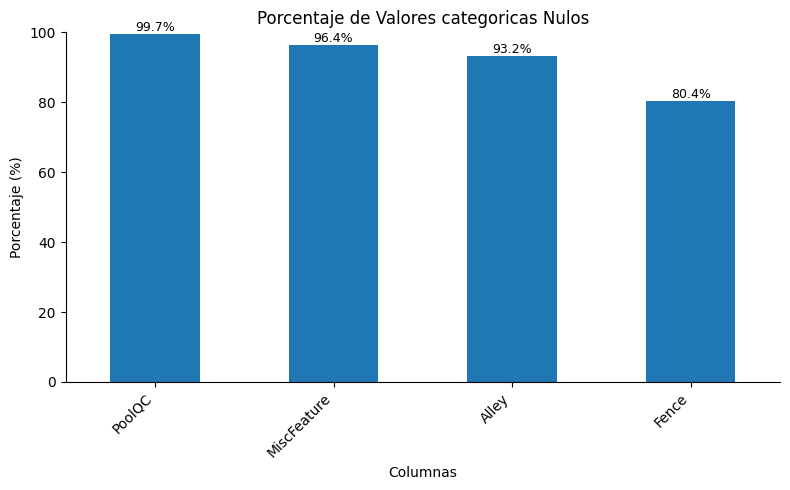

In [ ]:
df_nulo=valores_nulos(df,df.select_dtypes('object'),porc=80)
grafica_barra(df_nulo,['columna','porcentaje_nulos'],'categoricas Nulos')

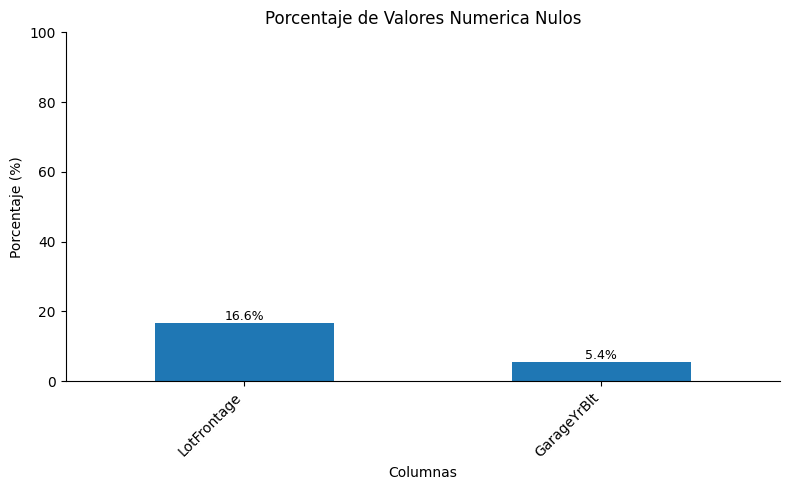

In [ ]:
df_nulo=valores_nulos(df,df.select_dtypes('number'),porc=5)
grafica_barra(df_nulo,['columna','porcentaje_nulos'],'Numerica Nulos' )

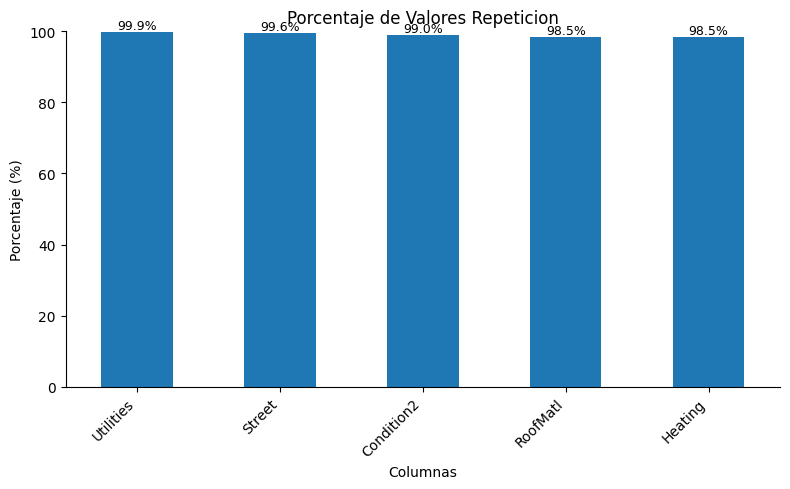

In [ ]:
repeat=repeat_valores(df,df.select_dtypes('object') ,96)
grafica_barra( repeat,['columna','porcentaje_repeat'],'Repeticion')

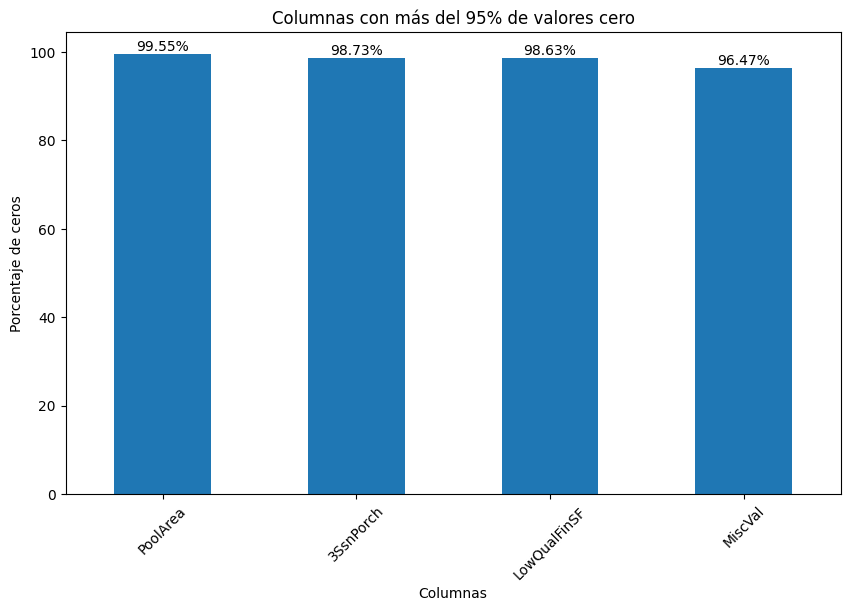

In [ ]:
numeric_cat=df.select_dtypes(include=['number']).columns

#mostrar cuales tienes mayores numero de cero
data=df[numeric_cat]
zero_percentage = (data == 0).sum() / len(data) * 100
high_zero_columns = zero_percentage[zero_percentage > 95]


plt.figure(figsize=(10, 6))
bars = high_zero_columns.sort_values(ascending=False).plot(kind='bar')

# Agregar los valores del porcentaje en cada barra
for bar in bars.containers[0]:
    bars.annotate(f"{bar.get_height():.2f}%",
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black')

# Etiquetas y título
plt.xlabel("Columnas")
plt.ylabel("Porcentaje de ceros")
plt.title("Columnas con más del 95% de valores cero")

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.show()




In [ ]:
mode_feature = ['Electrical', 'MSZoning', 'Functional', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'SaleType'] # , 'Utilities'
df[mode_feature].head()

,Electrical,MSZoning,Functional,KitchenQual,Exterior2nd,Exterior1st,SaleType
0,SBrkr,RL,Typ,Gd,VinylSd,VinylSd,WD
1,SBrkr,RL,Typ,TA,MetalSd,MetalSd,WD
2,SBrkr,RL,Typ,Gd,VinylSd,VinylSd,WD
3,SBrkr,RL,Typ,Gd,Wd Shng,Wd Sdng,WD
4,SBrkr,RL,Typ,Gd,VinylSd,VinylSd,WD


In [ ]:
# Calcula la matriz de correlaciones
corr_matrix = df.corr(numeric_only=True)

# Desenrolla la matriz de correlaciones en un formato de tabla
corr_pairs = corr_matrix.unstack()

# Elimina las correlaciones consigo mismas (1.0)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Elimina duplicados (A-B y B-A)
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)

# Muestra las correlaciones más altas
corr=corr_pairs [ corr_pairs>=0.8 ]
corr

,,0
GarageCars,GarageArea,0.890
YearBuilt,GarageYrBlt,0.835
GrLivArea,TotRmsAbvGrd,0.808
TotalBsmtSF,1stFlrSF,0.802


In [ ]:
#numerical_feature   = train.drop(['Id','SalePrice'],axis=1).select_dtypes(include=['number']).columns
#skewness_train = train[numerical_feature].skew().sort_values(ascending=False)
#skewness_test  = test[numerical_feature].skew().sort_values(ascending=False)

#avg_skewness = (skewness_train + skewness_test) / 2
#avg_skewness = avg_skewness.sort_values(ascending=False)

#print(avg_skewness)

In [ ]:
cols_to_transform = ['LotArea', 'BsmtUnfSF']
df[cols_to_transform].head()

,LotArea,BsmtUnfSF
0,8450,150.000
1,9600,284.000
2,11250,434.000
3,9550,540.000
4,14260,490.000


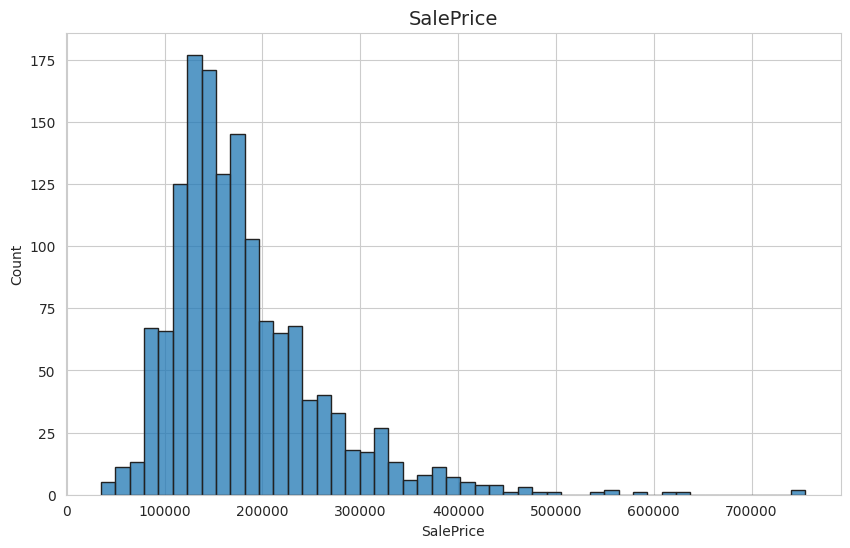

In [ ]:
sns.set_style("whitegrid")
edgecolor = '#222222'
shrink = .95
bins = 12

data=train.copy()


plt.figure(figsize=(10, 6))
plt.title(label="SalePrice", fontsize=14)
sns.histplot(data=data, x='SalePrice',edgecolor=edgecolor)
plt.show()

<ipython-input-16-afb5addf251e>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12.24769912 12.10901644 12.31717117 ... 12.49313327 11.86446927
 11.90159023]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, 'SalePrice'] = np.log1p(data['SalePrice']).astype("float64")


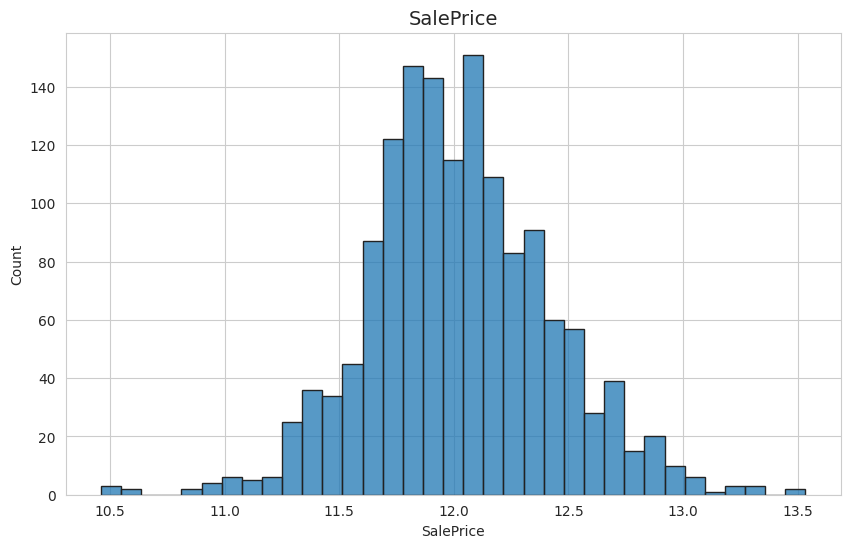

In [ ]:
data.loc[:, 'SalePrice'] = np.log1p(data['SalePrice']).astype("float64")


plt.figure(figsize=(10, 6))
plt.title(label="SalePrice", fontsize=14)
sns.histplot(data=data, x='SalePrice', edgecolor=edgecolor)
plt.show()

In [ ]:
palette = sns.color_palette('pastel',n_colors=4)

def create_group_graphic(data, group, group_name='', n_cols=5, scale_figsize_x=4, scale_figsize_y=3):
    n_rows = int(len(group) / n_cols) + 1
    figsize = np.array([n_cols, n_rows]) * [scale_figsize_x, scale_figsize_y]
    plt.figure(figsize=figsize)
    plt.suptitle("Histograma de "+group_name)

    for i, col in enumerate(group):
        plt.subplot(n_rows, n_cols, i+1)
        plt.title(label=f"{col}")
        ax = sns.histplot( data=data, x=col, edgecolor=edgecolor, shrink=shrink, bins=bins )

    plt.tight_layout()


def create_group_graphic_Sale(data, group, group_name='', n_cols=5, scale_figsize_x=4, scale_figsize_y=3):
    n_rows = int(len(group) / n_cols) + 1
    figsize = np.array([n_cols, n_rows]) * [scale_figsize_x, scale_figsize_y]
    plt.figure(figsize=figsize)
    plt.suptitle(group_name+" vs SalePrice")

    for i, col in enumerate(group):
        plt.subplot(n_rows, n_cols, i+1)
        plt.title(label=f"{col}")
        ax = sns.scatterplot( data=data, x=col, y='SalePrice') #,edgecolor=edgecolor, palette=palette, shrink=shrink, bins=bins

    plt.tight_layout()


def create_group_graphic_Box(data, group, group_name='', n_cols=4, scale_figsize_x=4, scale_figsize_y=3):
    n_rows = int(len(group) / n_cols) + 1
    figsize = np.array([n_cols, n_rows]) * [scale_figsize_x, scale_figsize_y]
    plt.figure(figsize=figsize)
    fontsize = 10
    plt.suptitle('Grafica BoxPlot', fontsize=fontsize)
    contador=0



    for i, col in enumerate(group):
      if train[col].dtype=='object':
        plt.subplot(n_rows, n_cols, contador+1,)
        plt.title(label=f"{col} vs SalePrice", fontsize=fontsize,)

        ax = sns.boxplot( data=train, y=col, x='SalePrice' ,legend=False,hue=col) #, order=vals_eval, orient='h'

        plt.xlabel('SalePrice', fontsize=fontsize)
        plt.ylabel(col, fontsize=fontsize)
        contador+=1

    plt.tight_layout()


def variable_count(df, columns):
   #salida=
   cols=['Valor','Cantidad','Porcentaje','Variable','Nulos','Porcentaje Nulos']
   dfout=pd.DataFrame(columns=cols)

   for col in columns:
      if train[col].dtype=='object':
        df=pd.DataFrame(columns=cols)
        data=train[col].value_counts()

        df['Valor']=data.index
        df['Cantidad']=data.values
        df['Porcentaje']=round( (df['Cantidad']/train.shape[0])*100 ,2)  #df['Cantidad'].sum()
        df['Variable']=col
        df['Nulos']=train[col].isna().sum()
        df['Porcentaje Nulos']=round( (df['Nulos']/train.shape[0])*100 ,2)

        dfout=pd.concat([dfout,df])

   data=dfout[['Variable','Valor','Cantidad','Porcentaje','Nulos','Porcentaje Nulos']]
   return data


def variable_frecuencia(df, columns):
  data=train[columns].describe(include=['O']).T
  data['Porcentaje Freq']=round( (data['freq']/train.shape[0])*100,2)
  #nulos
  data['Nulos']=train[columns].isna().sum()
  data['Porcentaje Nulos']=round( (data['Nulos']/train.shape[0])*100,2)

  data.sort_values(by='Porcentaje Freq',ascending=False)
  return data


def detect_outliers(df, features):
    outliers = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers[col])} outliers detectados")
    return outliers

In [ ]:
# Características del sótano
bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF']

# Características del garaje
garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

# Características del Porch
porch_cols = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

# Características de la veranda
sale_cond_cols = ['MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

# Características del sitio
lot_cols = ['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'PavedDrive']

# Características de la casa
house_cols = [
    'MSSubClass', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
    'ExterCond', 'Foundation', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Functional', 'WoodDeckSF'
]

# Características de Servicios
comfort_cols = [
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Fireplaces', 'FireplaceQu', 'PoolArea', 'PoolQC',
    'Fence', 'MiscFeature', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
]

In [ ]:
variable_frecuencia(train,bsmt_cols)

,count,unique,top,freq,Porcentaje Freq,Nulos,Porcentaje Nulos
BsmtQual,1423,4,TA,649,44.452,37,2.530
BsmtCond,1423,4,TA,1311,89.795,37,2.530
BsmtExposure,1422,4,No,953,65.274,38,2.600
BsmtFinType1,1423,6,Unf,430,29.452,37,2.530
BsmtFinType2,1422,6,Unf,1256,86.027,38,2.600


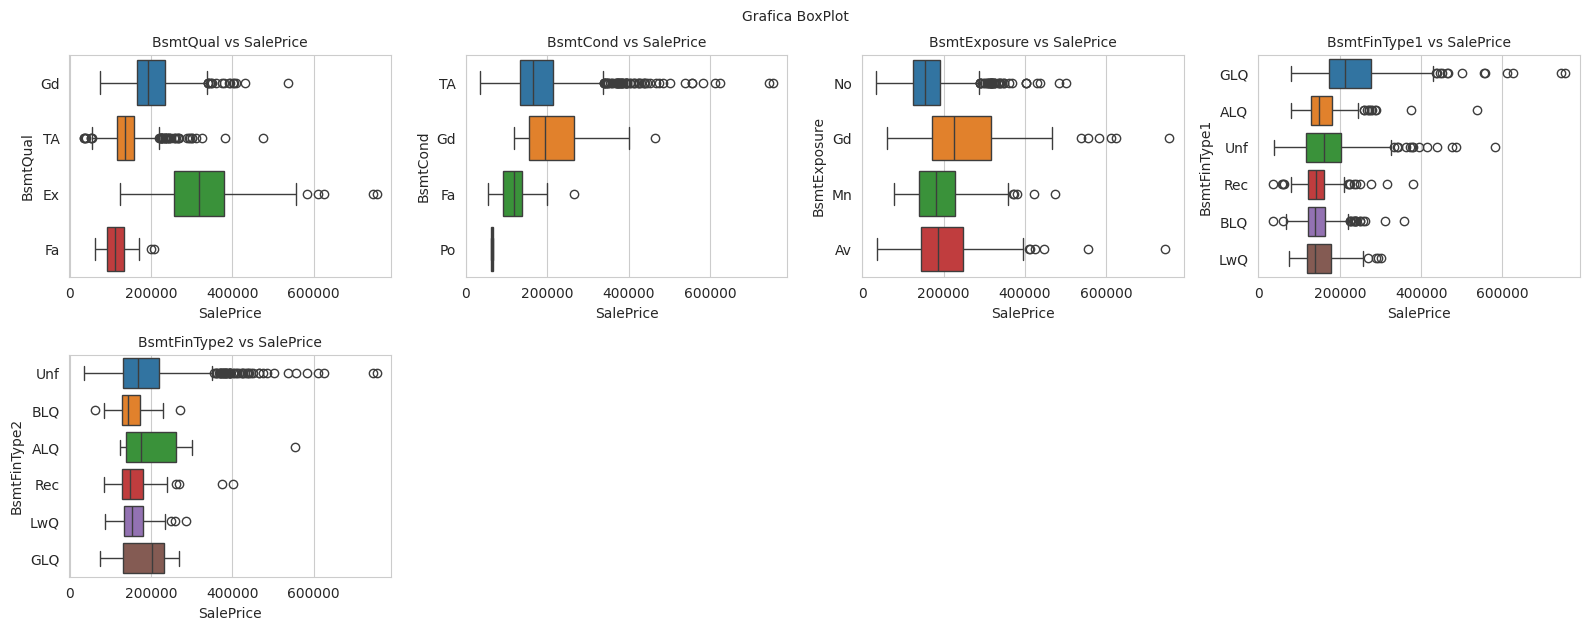

In [ ]:
create_group_graphic_Box(train, bsmt_cols, 'bsmt')

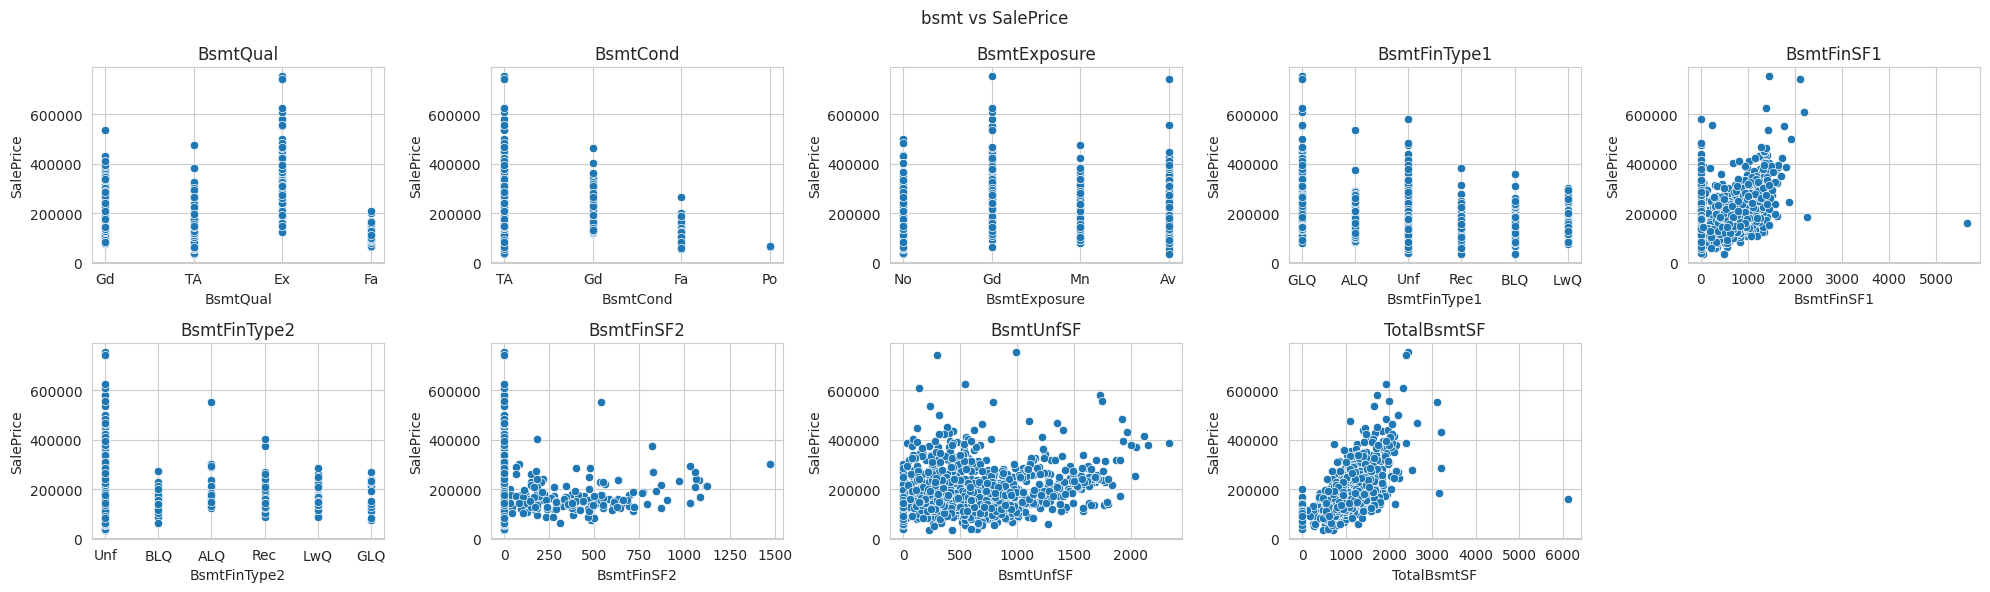

In [ ]:
create_group_graphic_Sale(train, bsmt_cols, 'bsmt')

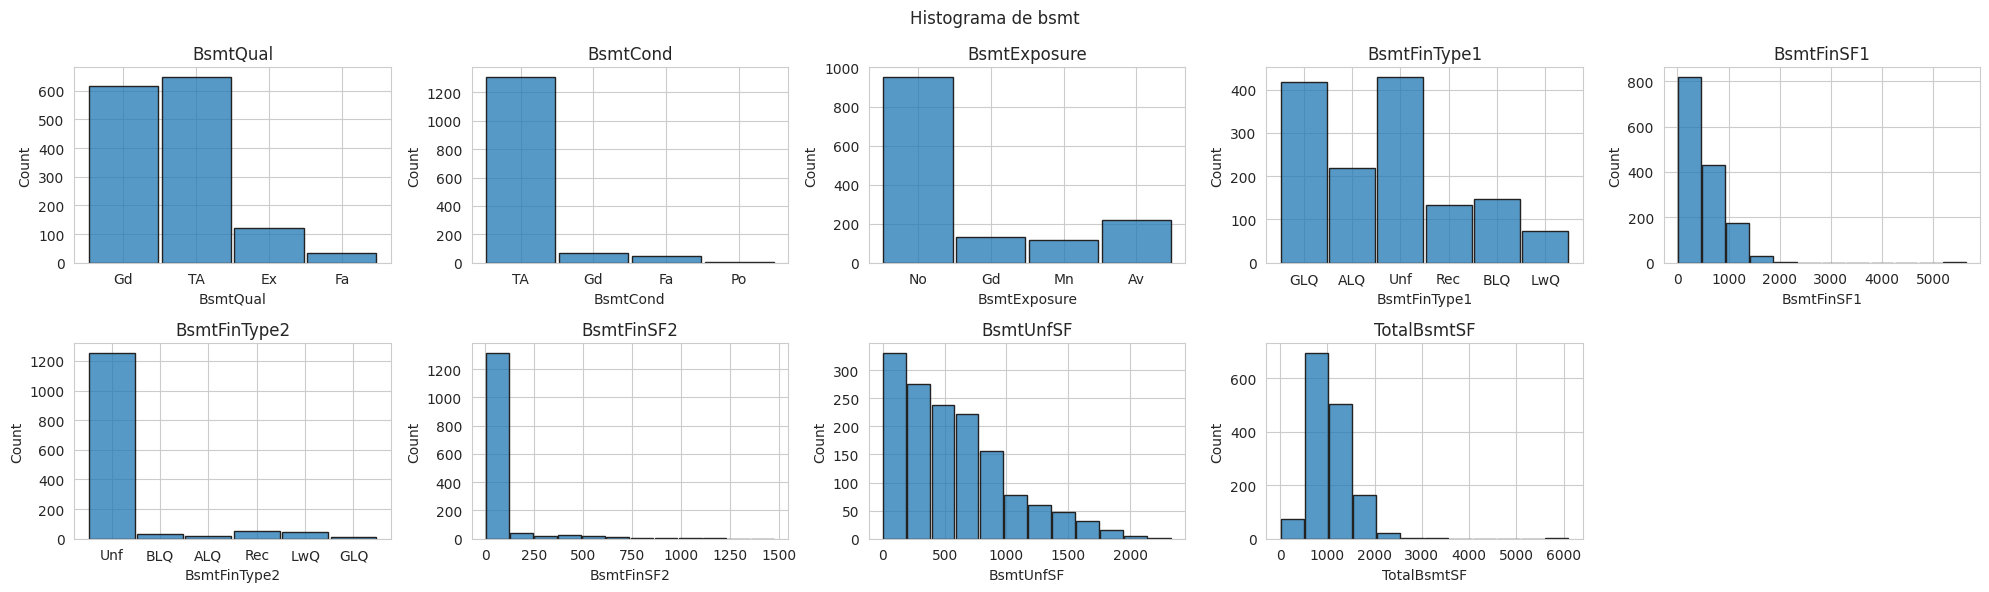

In [ ]:
create_group_graphic(train, bsmt_cols, 'bsmt')

In [ ]:
variable_frecuencia(train,garage_cols)

,count,unique,top,freq,Porcentaje Freq,Nulos,Porcentaje Nulos
GarageType,1379,6,Attchd,870,59.589,81,5.550
GarageFinish,1379,3,Unf,605,41.438,81,5.550
GarageQual,1379,5,TA,1311,89.795,81,5.550
GarageCond,1379,5,TA,1326,90.822,81,5.550


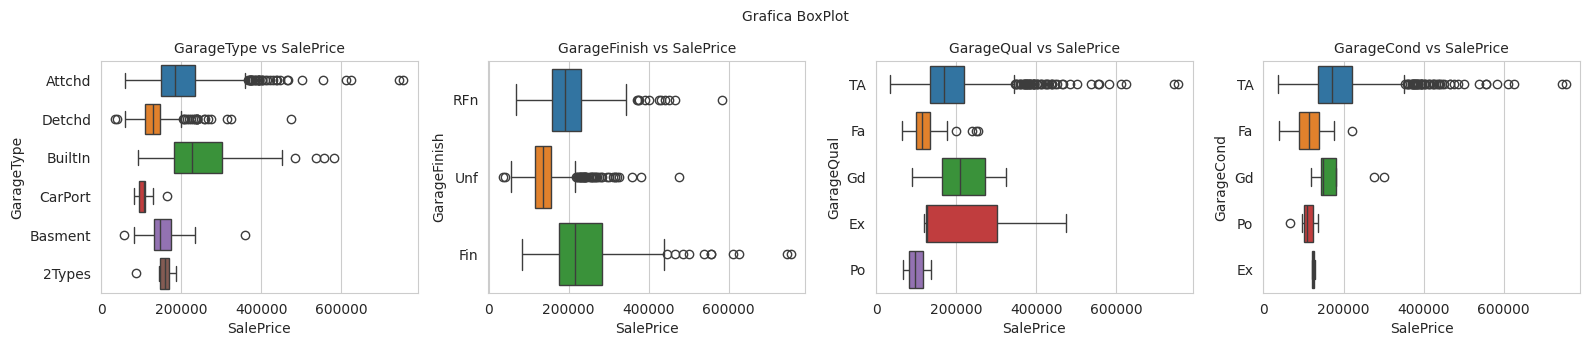

In [ ]:
create_group_graphic_Box(train, garage_cols, 'Garage')

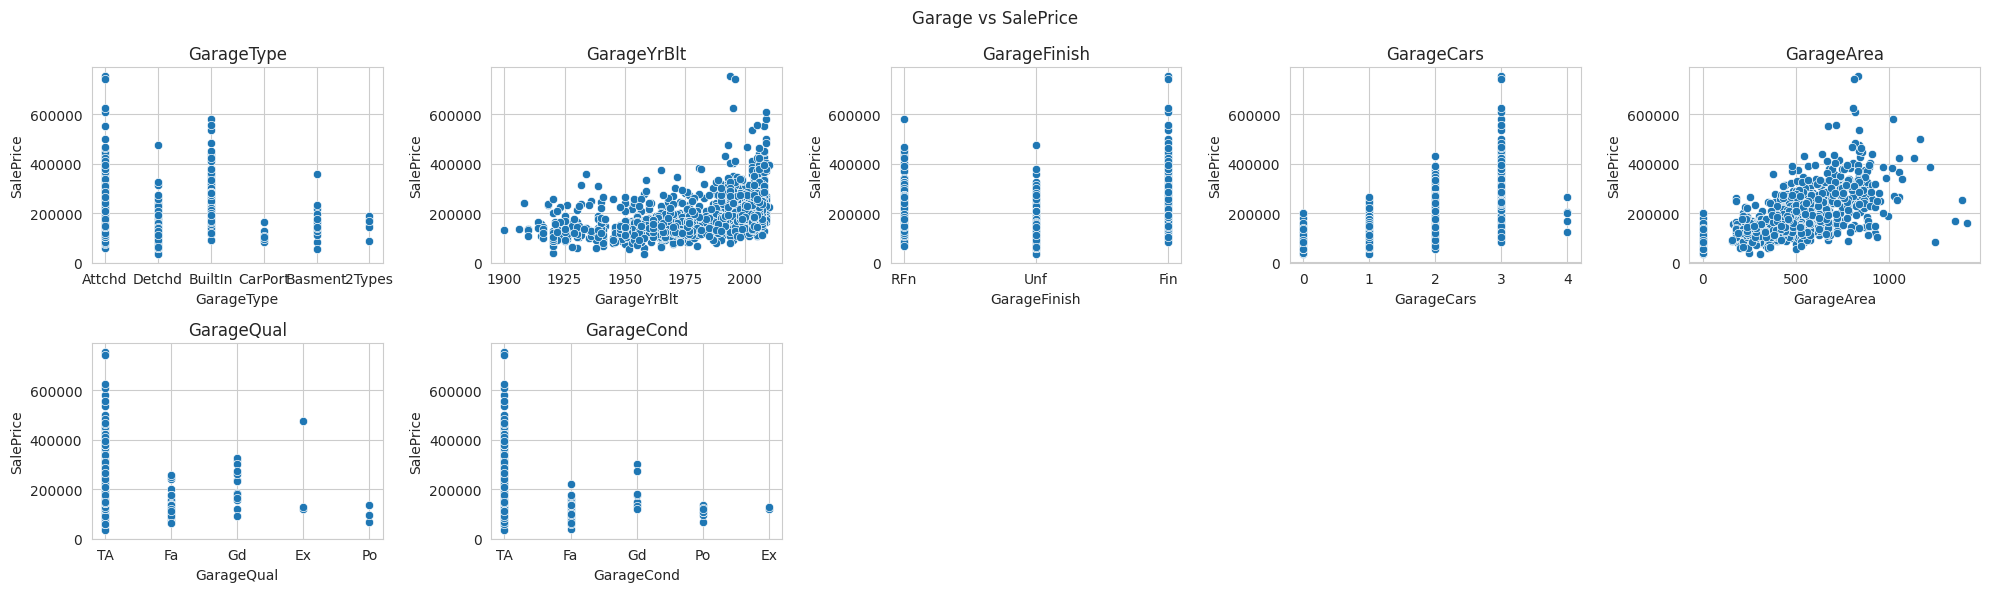

In [ ]:
create_group_graphic_Sale(train, garage_cols, 'Garage')

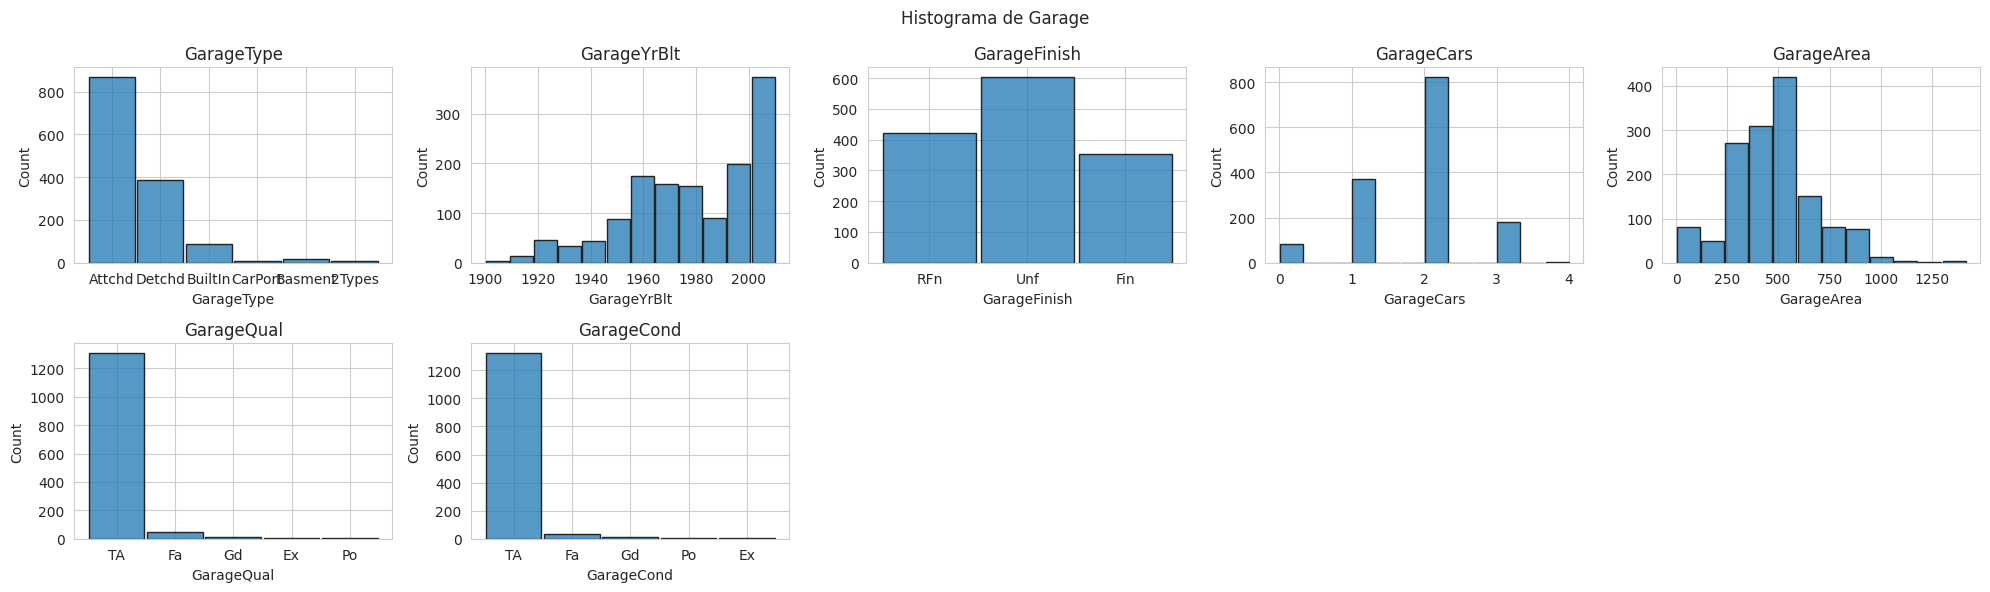

In [ ]:
create_group_graphic(train, garage_cols, 'Garage')

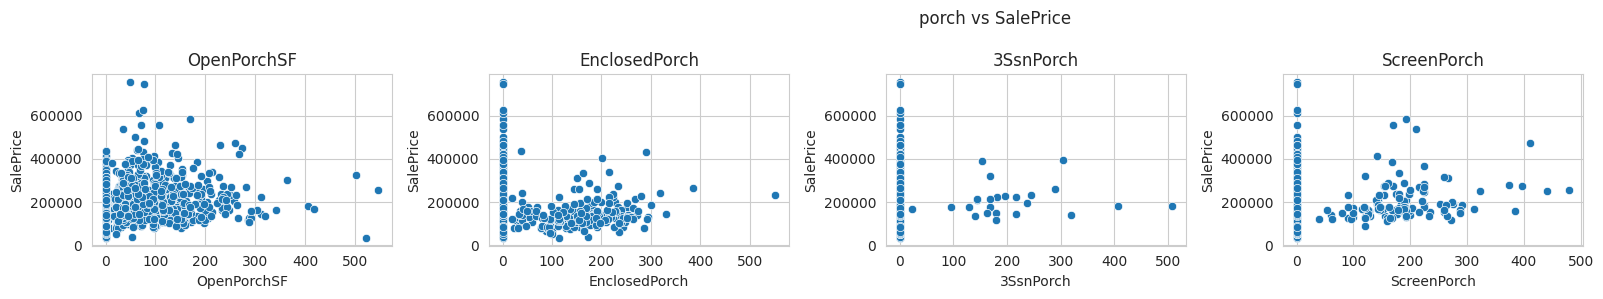

In [ ]:
create_group_graphic_Sale(train, porch_cols, 'porch')

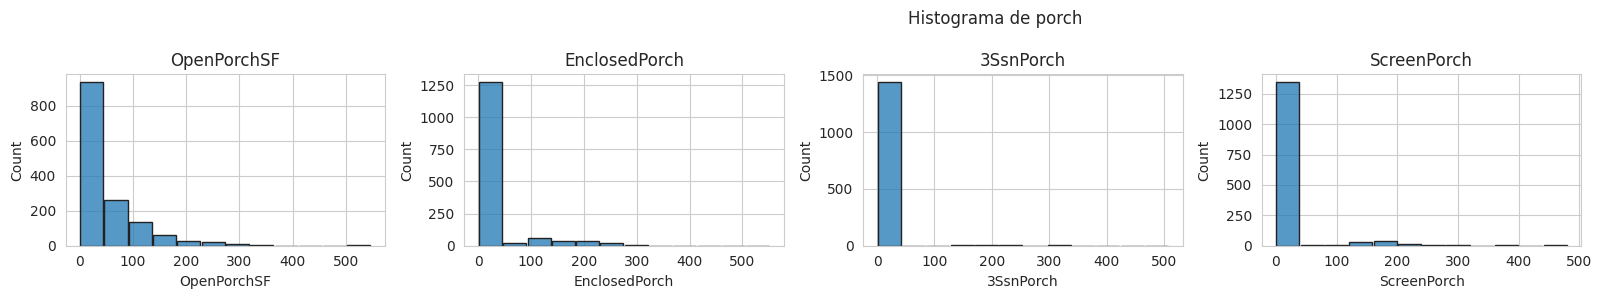

In [ ]:
create_group_graphic(train, porch_cols, 'porch')

In [ ]:
variable_frecuencia(train,sale_cond_cols)

,count,unique,top,freq,Porcentaje Freq,Nulos,Porcentaje Nulos
SaleType,1460,9,WD,1267,86.781,0,0.000
SaleCondition,1460,6,Normal,1198,82.055,0,0.000


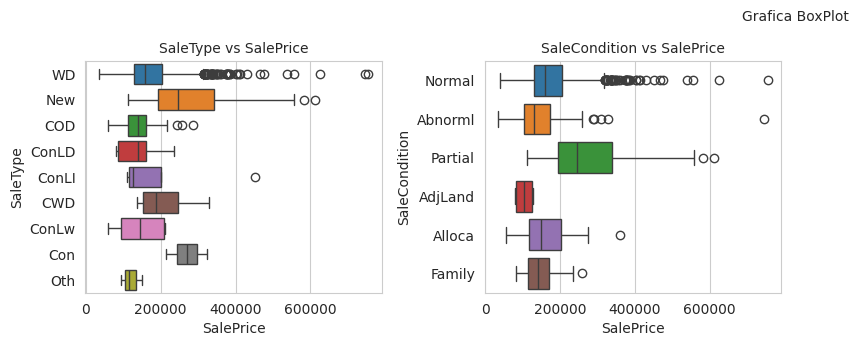

In [ ]:
create_group_graphic_Box(train, sale_cond_cols, 'Condicion de venta')

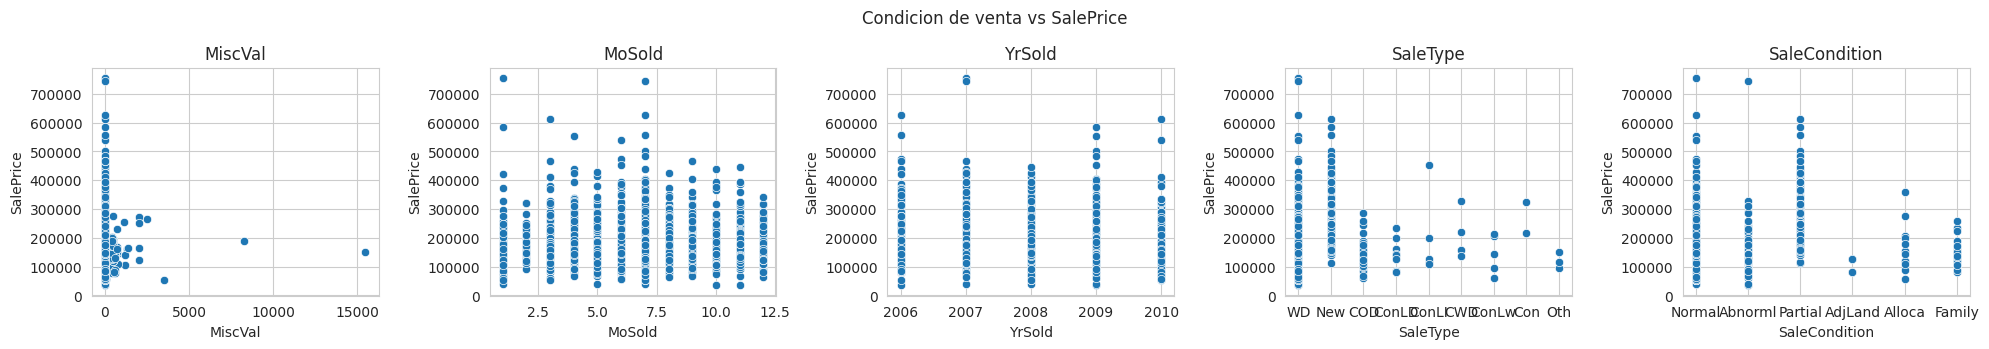

In [ ]:
create_group_graphic_Sale(train, sale_cond_cols, 'Condicion de venta')

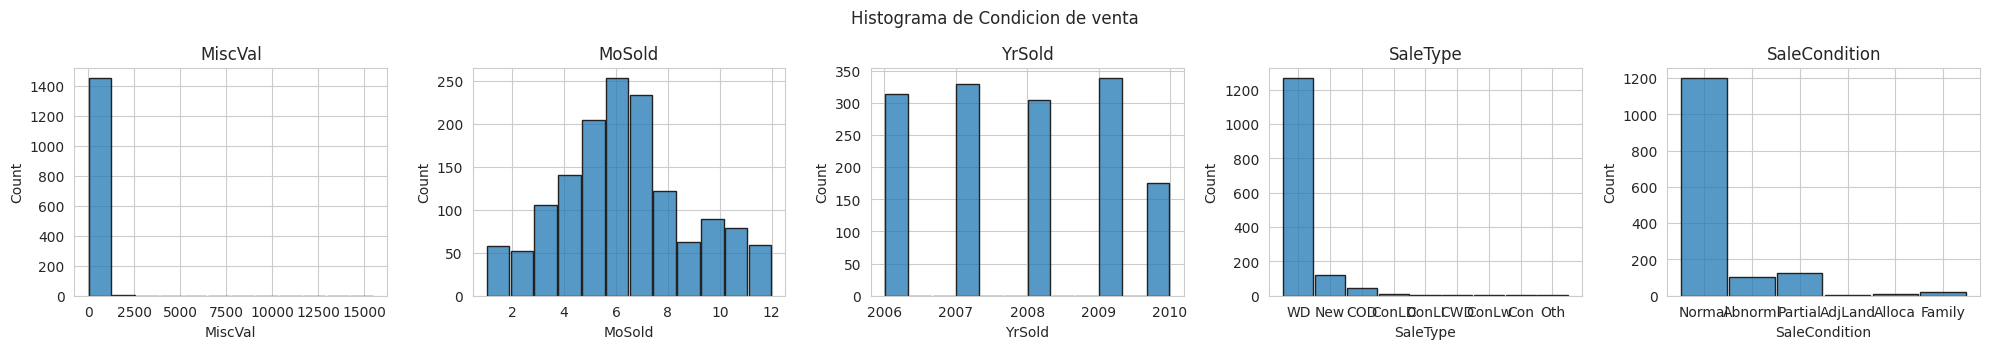

In [ ]:
create_group_graphic(train, sale_cond_cols, 'Condicion de venta')

In [ ]:
variable_frecuencia(train,lot_cols)

,count,unique,top,freq,Porcentaje Freq,Nulos,Porcentaje Nulos
MSZoning,1460,5,RL,1151,78.836,0,0.000
Street,1460,2,Pave,1454,99.589,0,0.000
Alley,91,2,Grvl,50,3.425,1369,93.770
LotShape,1460,4,Reg,925,63.356,0,0.000
LandContour,1460,4,Lvl,1311,89.795,0,0.000
Utilities,1460,2,AllPub,1459,99.932,0,0.000
LotConfig,1460,5,Inside,1052,72.055,0,0.000
LandSlope,1460,3,Gtl,1382,94.658,0,0.000
Neighborhood,1460,25,NAmes,225,15.411,0,0.000
Condition1,1460,9,Norm,1260,86.301,0,0.000


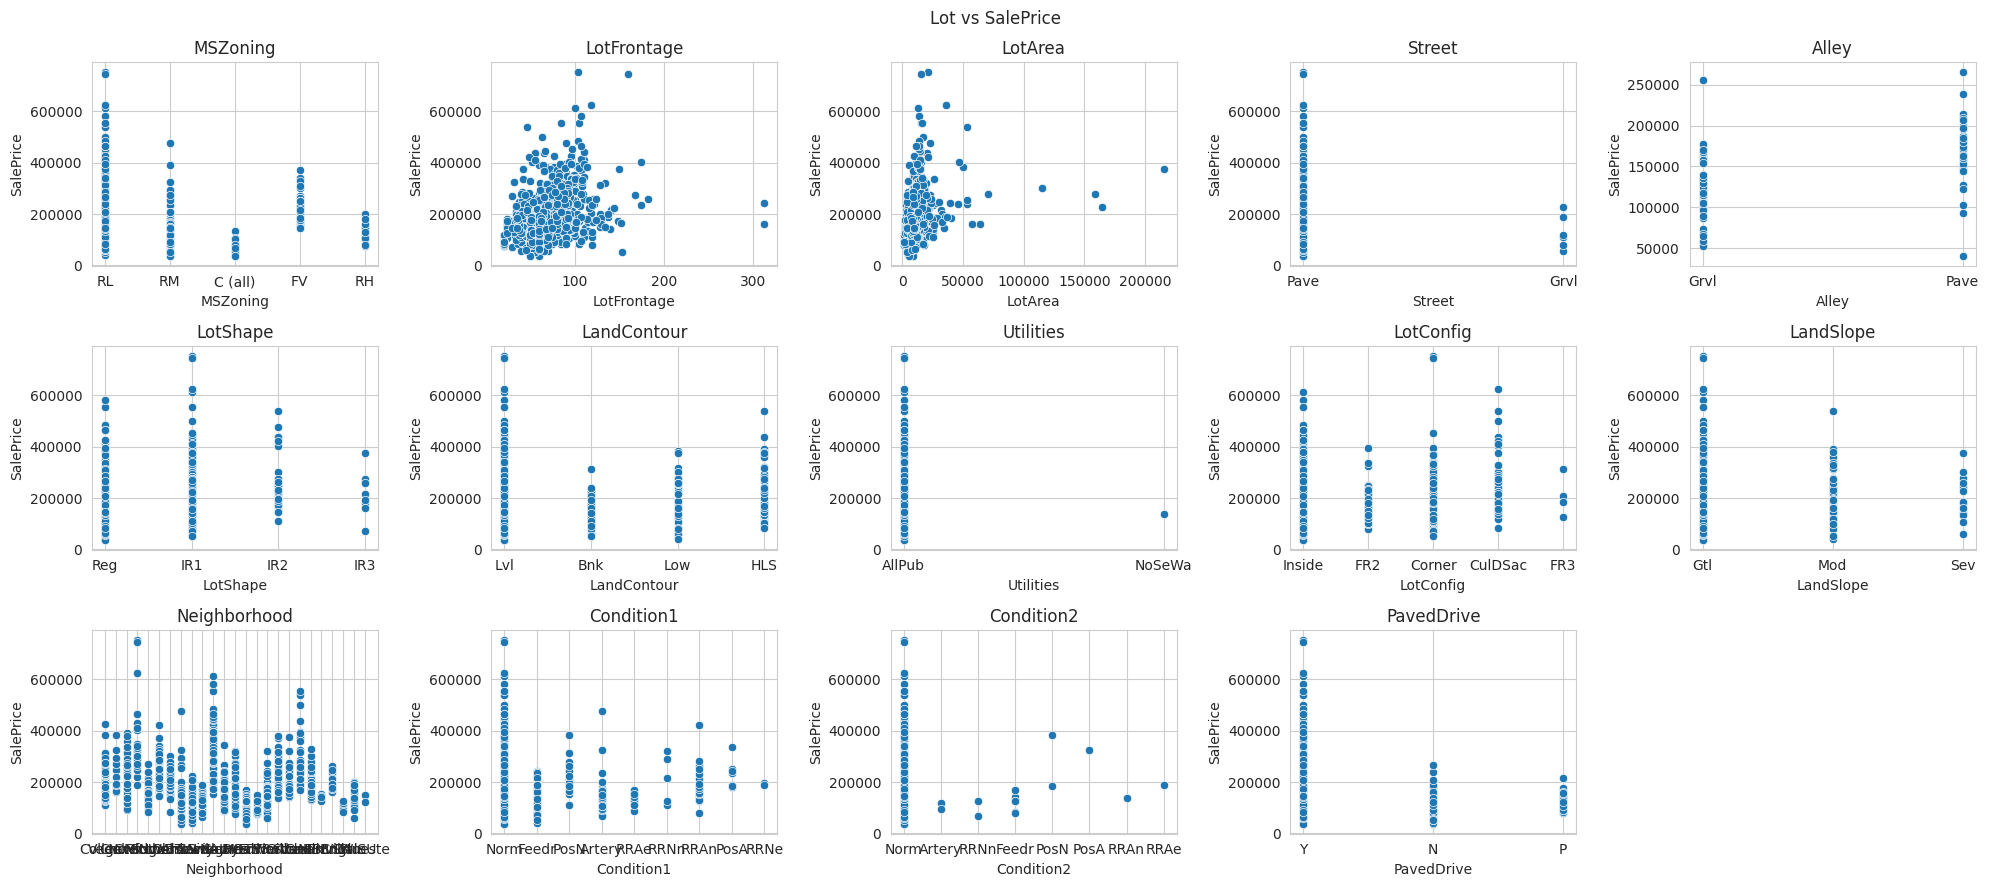

In [ ]:
create_group_graphic_Sale(train, lot_cols, 'Lot')

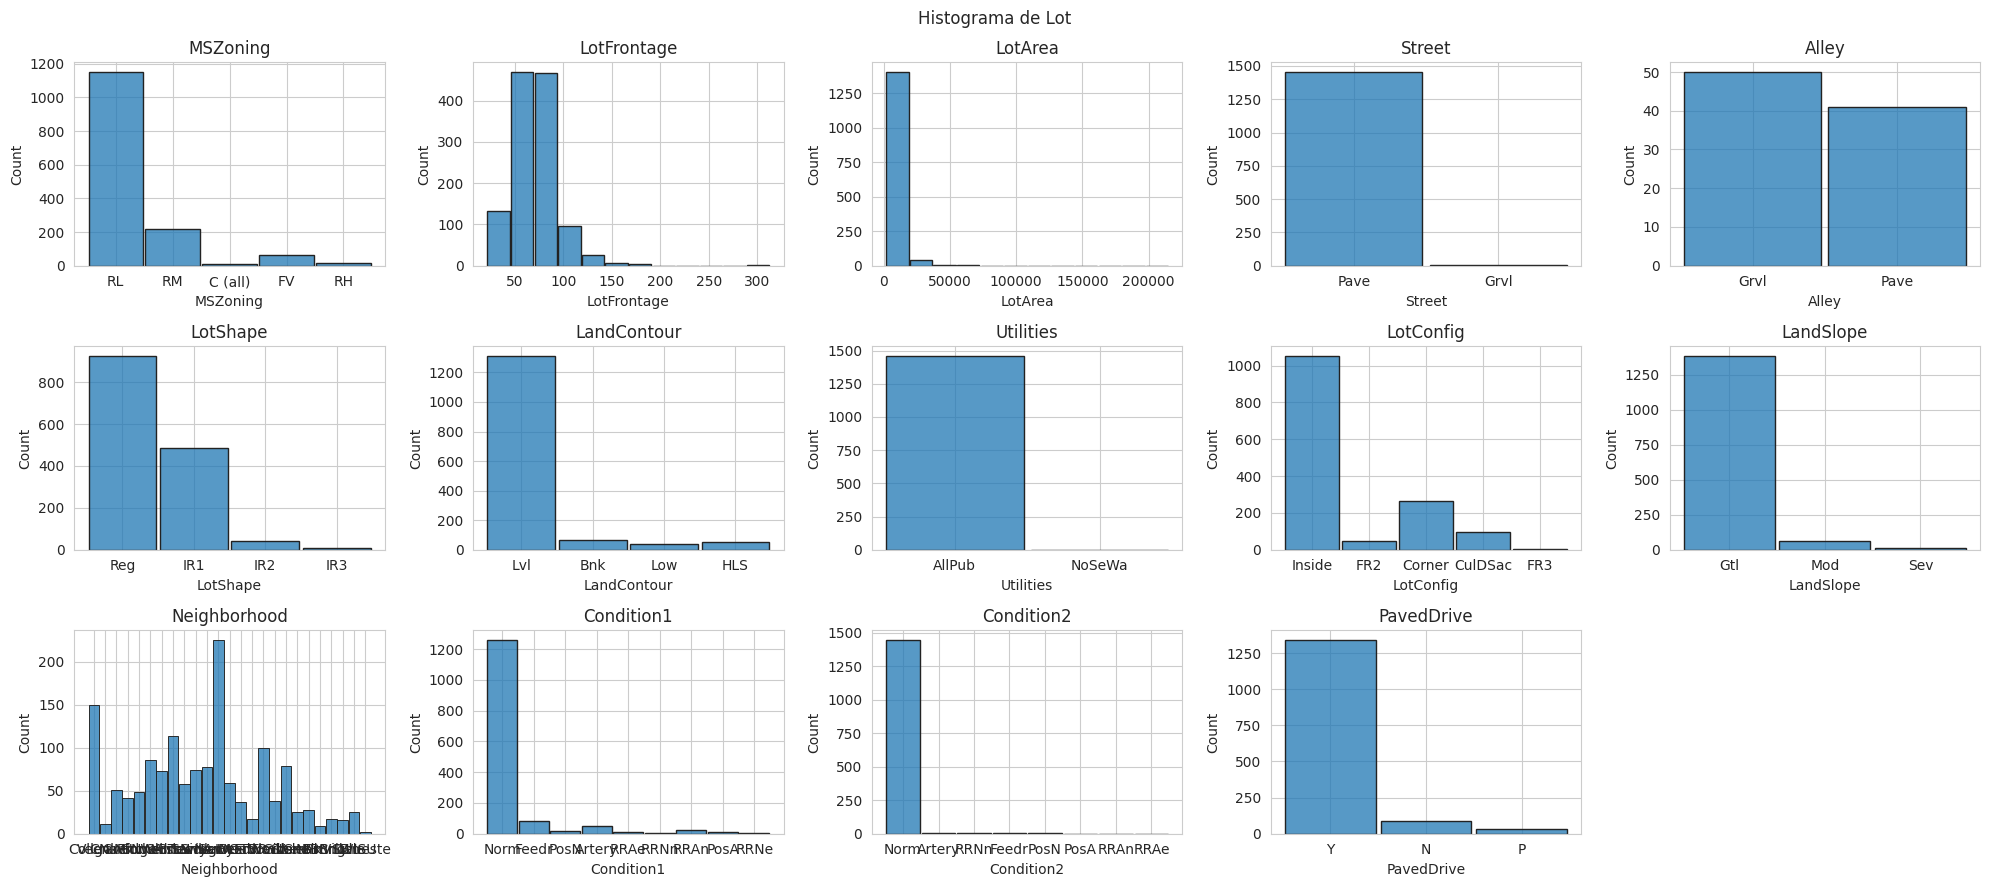

In [ ]:
create_group_graphic(train, lot_cols, 'Lot')

In [ ]:
variable_frecuencia(train,house_cols)

,count,unique,top,freq,Porcentaje Freq,Nulos,Porcentaje Nulos
BldgType,1460,5,1Fam,1220,83.562,0,0.000
HouseStyle,1460,8,1Story,726,49.726,0,0.000
RoofStyle,1460,6,Gable,1141,78.151,0,0.000
RoofMatl,1460,8,CompShg,1434,98.219,0,0.000
Exterior1st,1460,15,VinylSd,515,35.274,0,0.000
Exterior2nd,1460,16,VinylSd,504,34.521,0,0.000
MasVnrType,588,3,BrkFace,445,30.479,872,59.730
ExterQual,1460,4,TA,906,62.055,0,0.000
ExterCond,1460,5,TA,1282,87.808,0,0.000
Foundation,1460,6,PConc,647,44.315,0,0.000


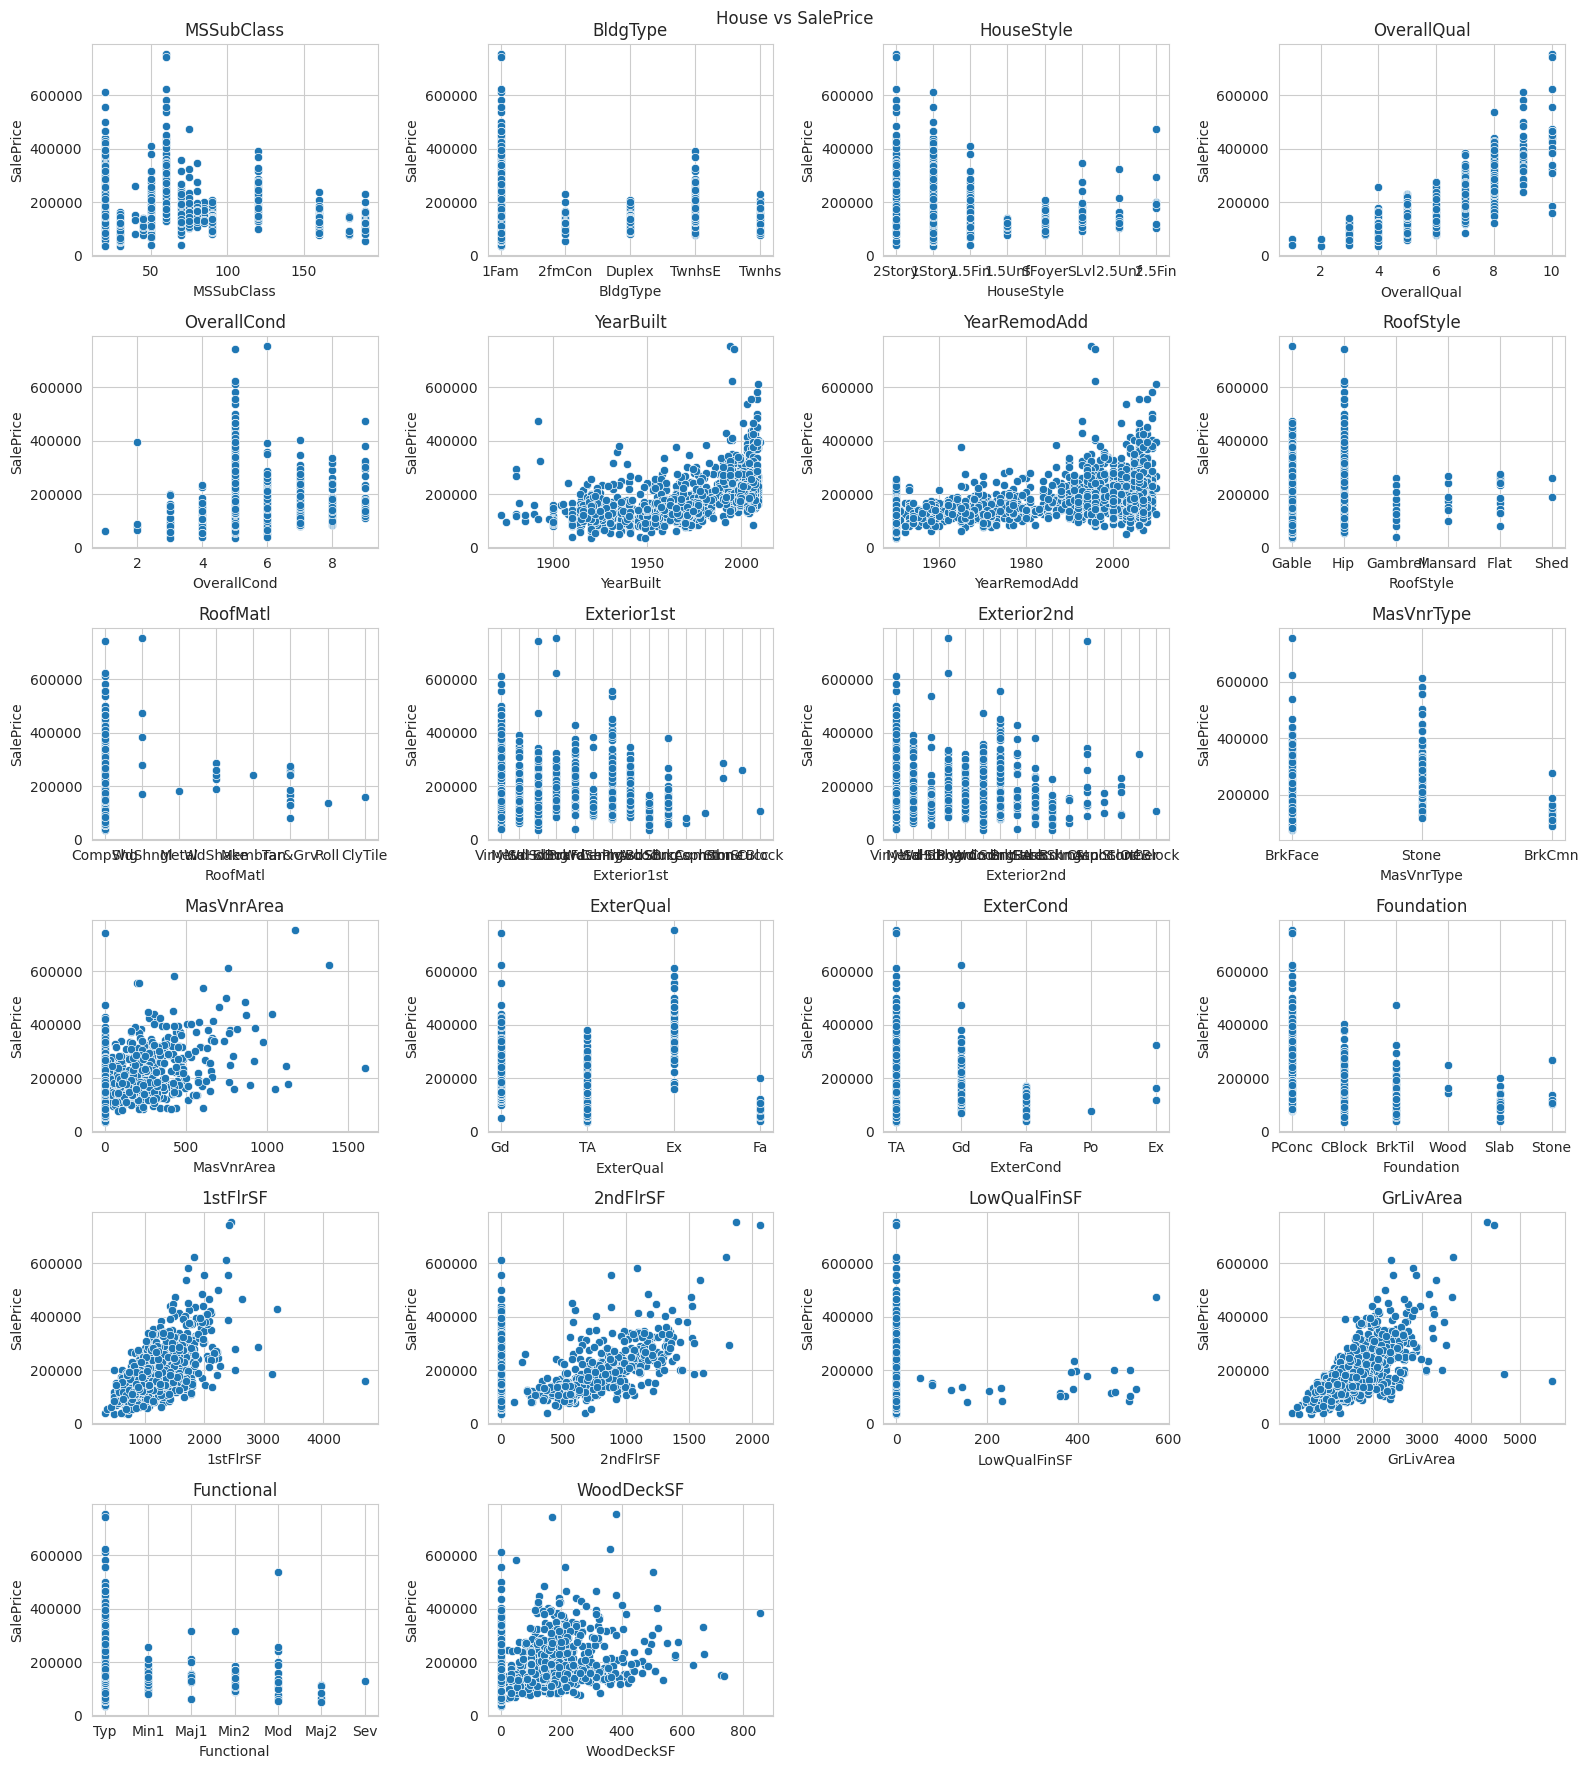

In [ ]:
create_group_graphic_Sale(train, house_cols, 'House',4)

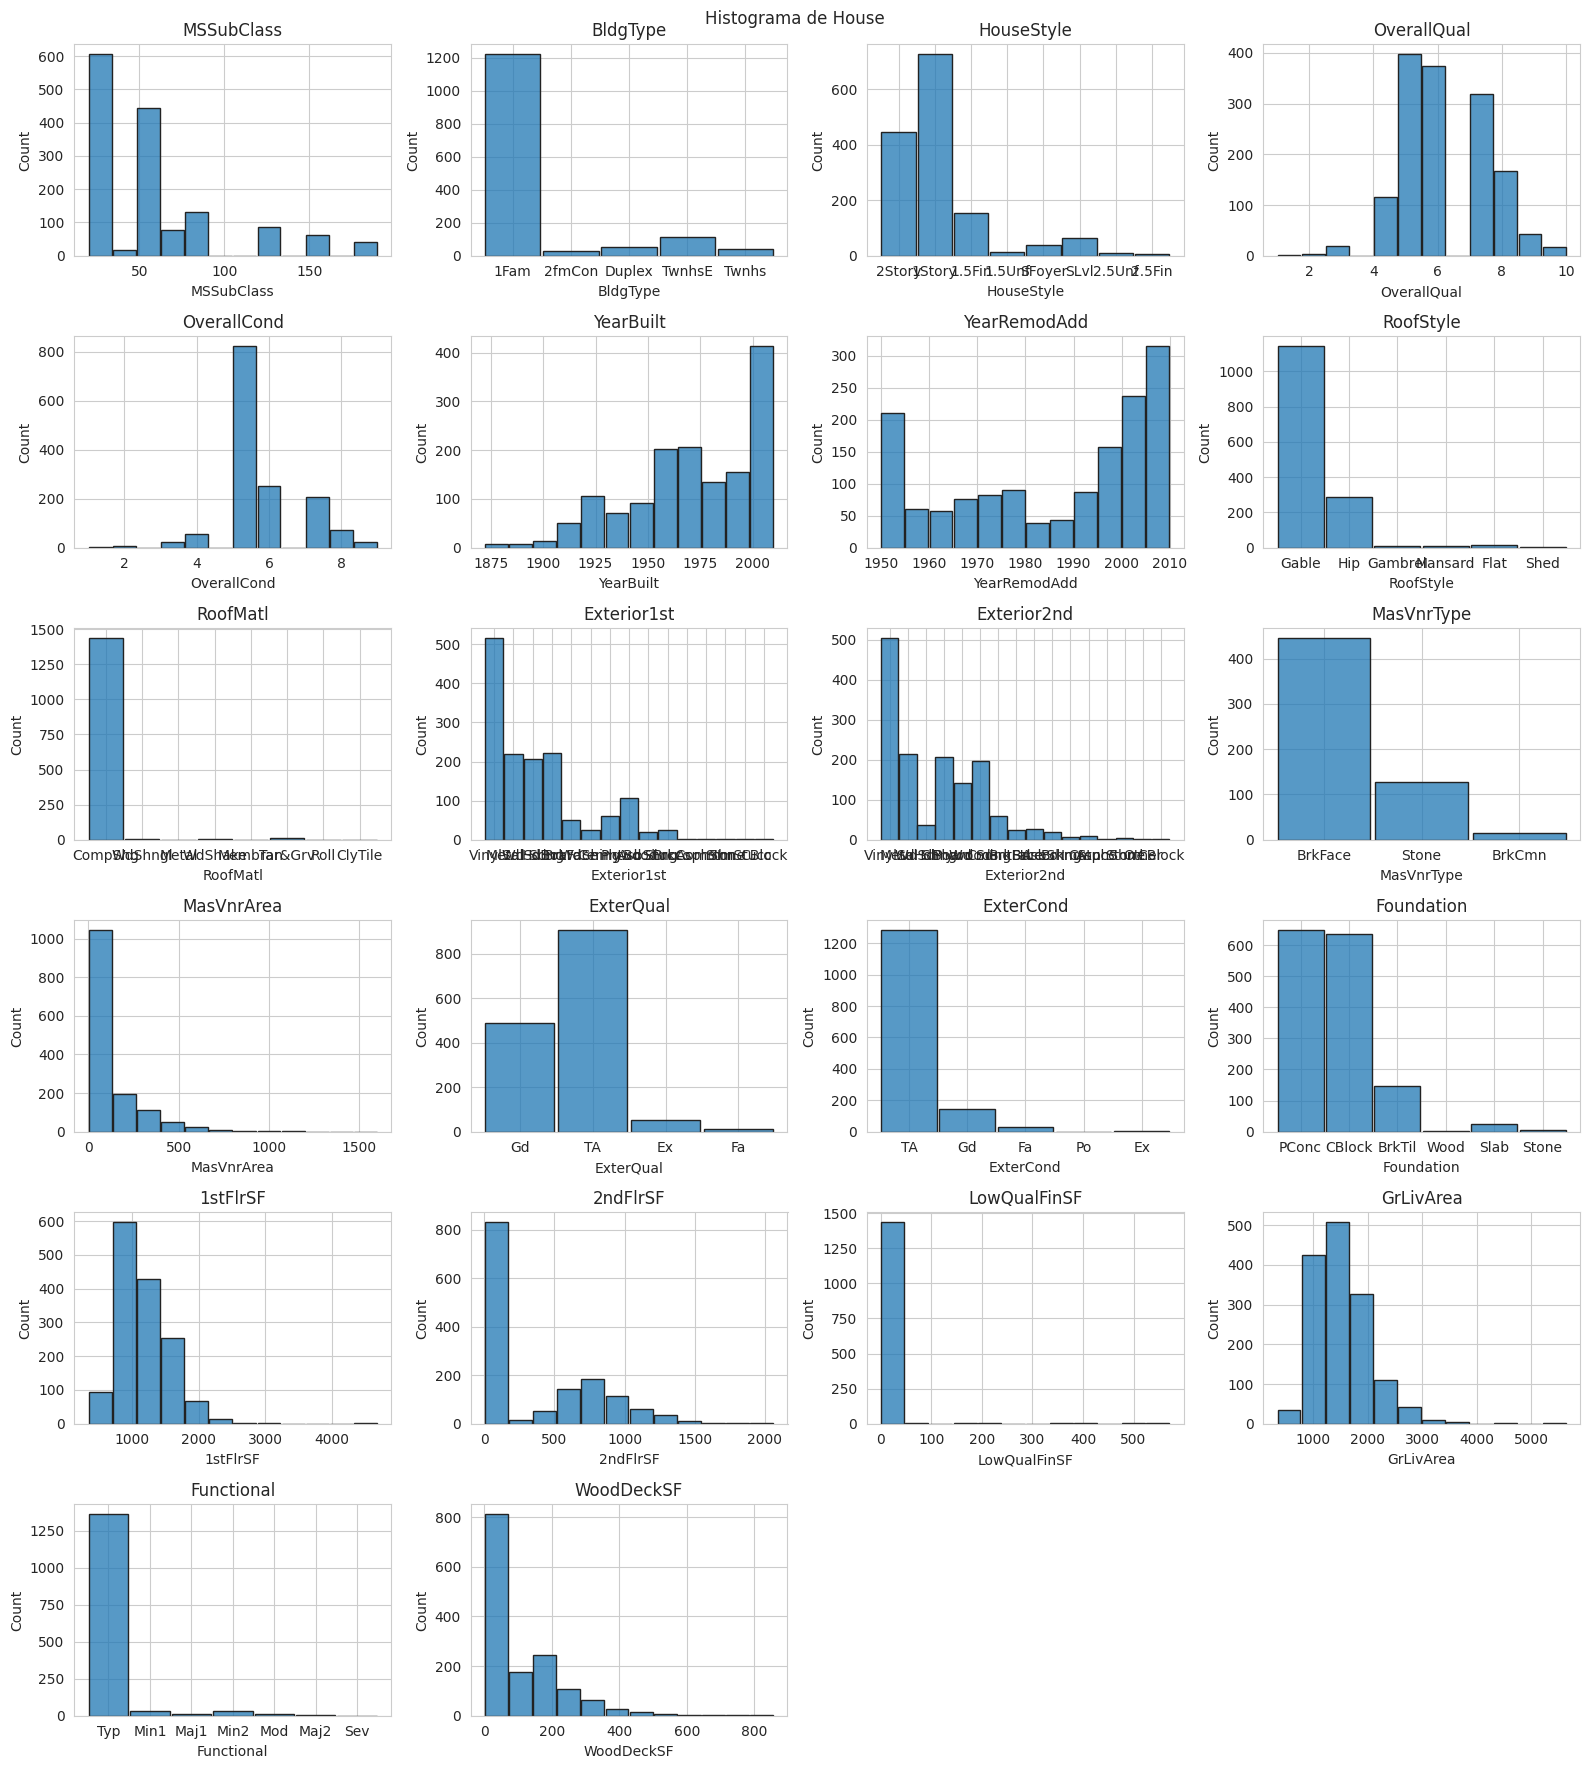

In [ ]:
create_group_graphic(train, house_cols, 'House',4)

In [ ]:
variable_frecuencia(train,comfort_cols)

,count,unique,top,freq,Porcentaje Freq,Nulos,Porcentaje Nulos
Heating,1460,6,GasA,1428,97.808,0,0.000
HeatingQC,1460,5,Ex,741,50.753,0,0.000
CentralAir,1460,2,Y,1365,93.493,0,0.000
Electrical,1459,5,SBrkr,1334,91.370,1,0.070
FireplaceQu,770,5,Gd,380,26.027,690,47.260
PoolQC,7,3,Gd,3,0.205,1453,99.520
Fence,281,4,MnPrv,157,10.753,1179,80.750
MiscFeature,54,4,Shed,49,3.356,1406,96.300
KitchenQual,1460,4,TA,735,50.342,0,0.000


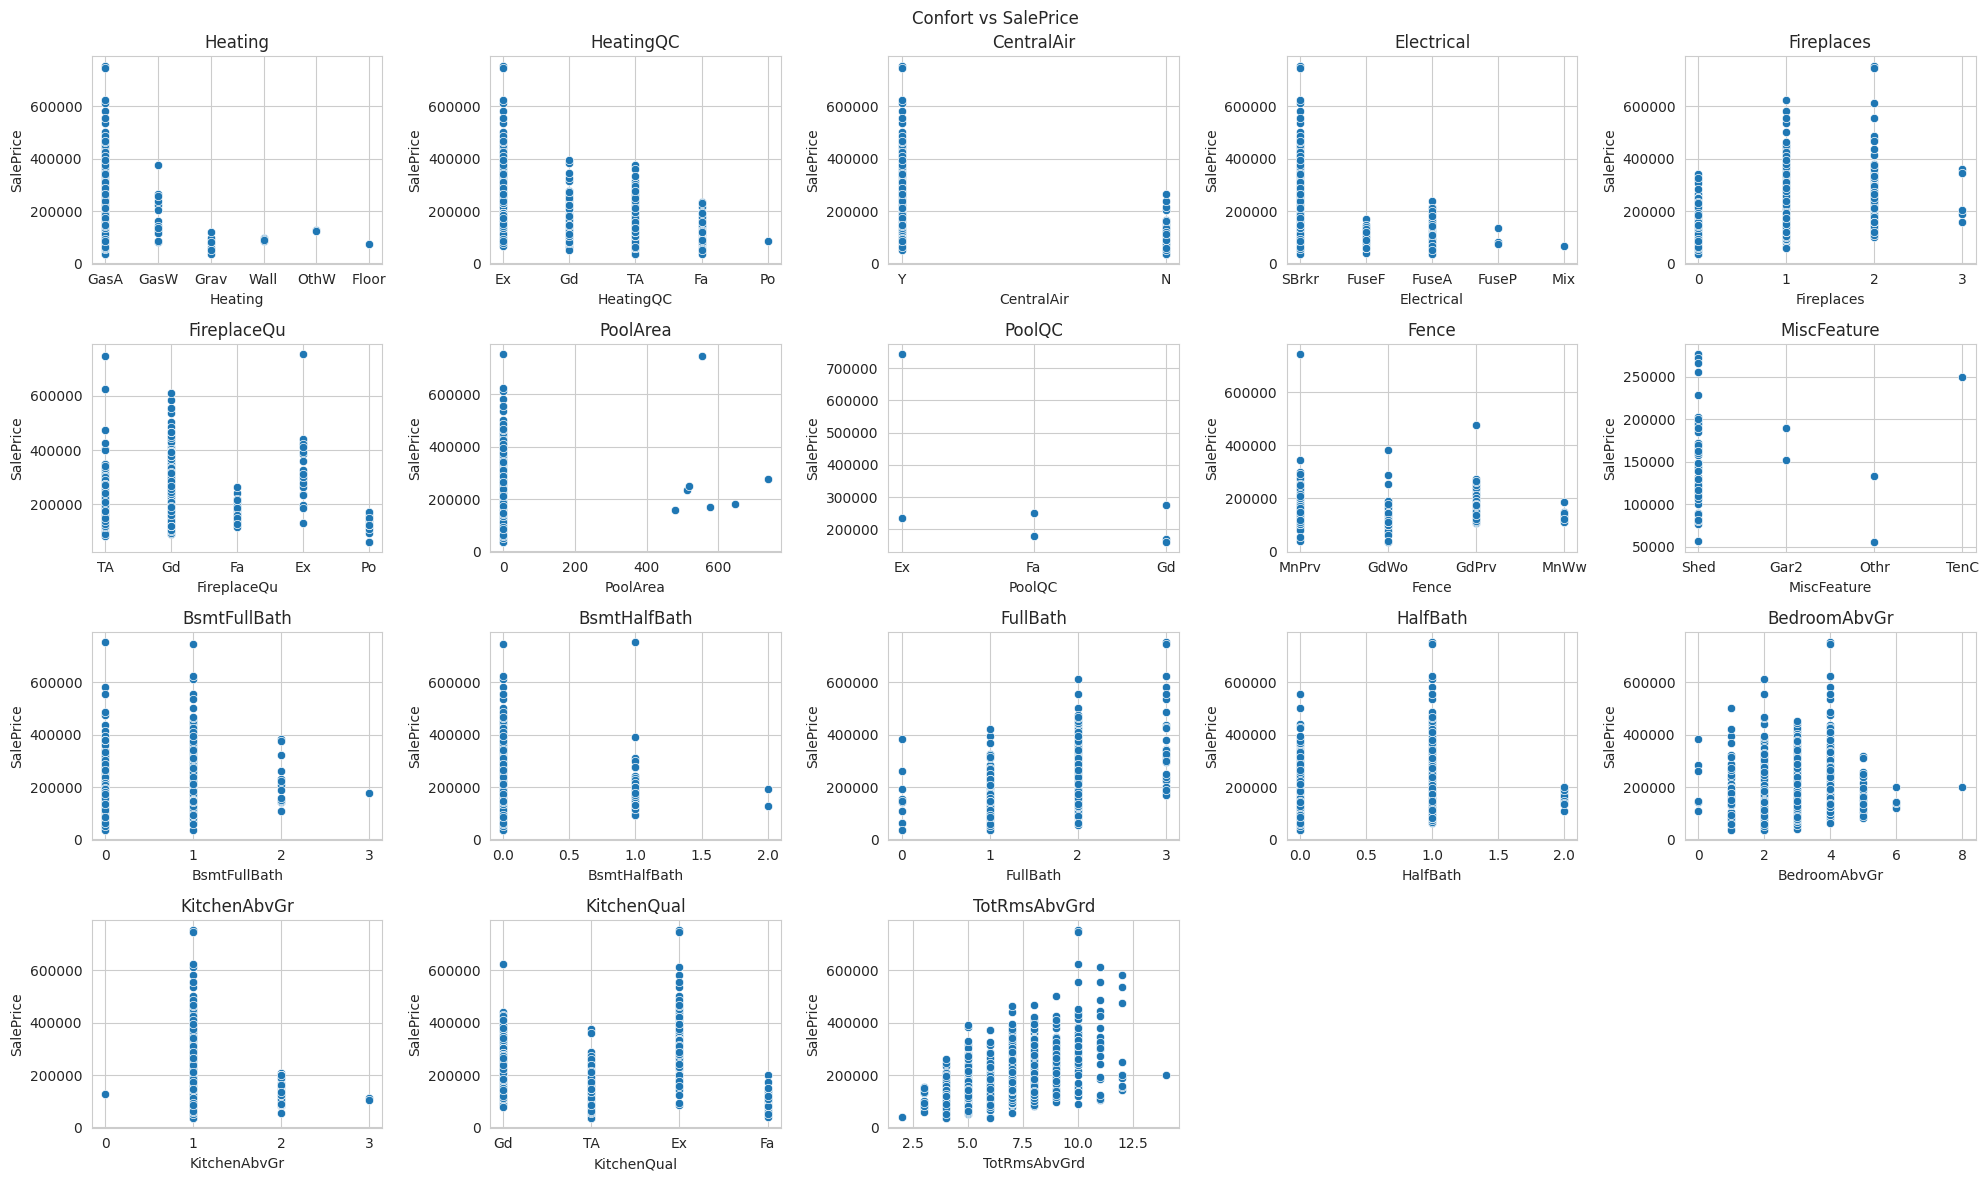

In [ ]:
create_group_graphic_Sale(train, comfort_cols, 'Confort')

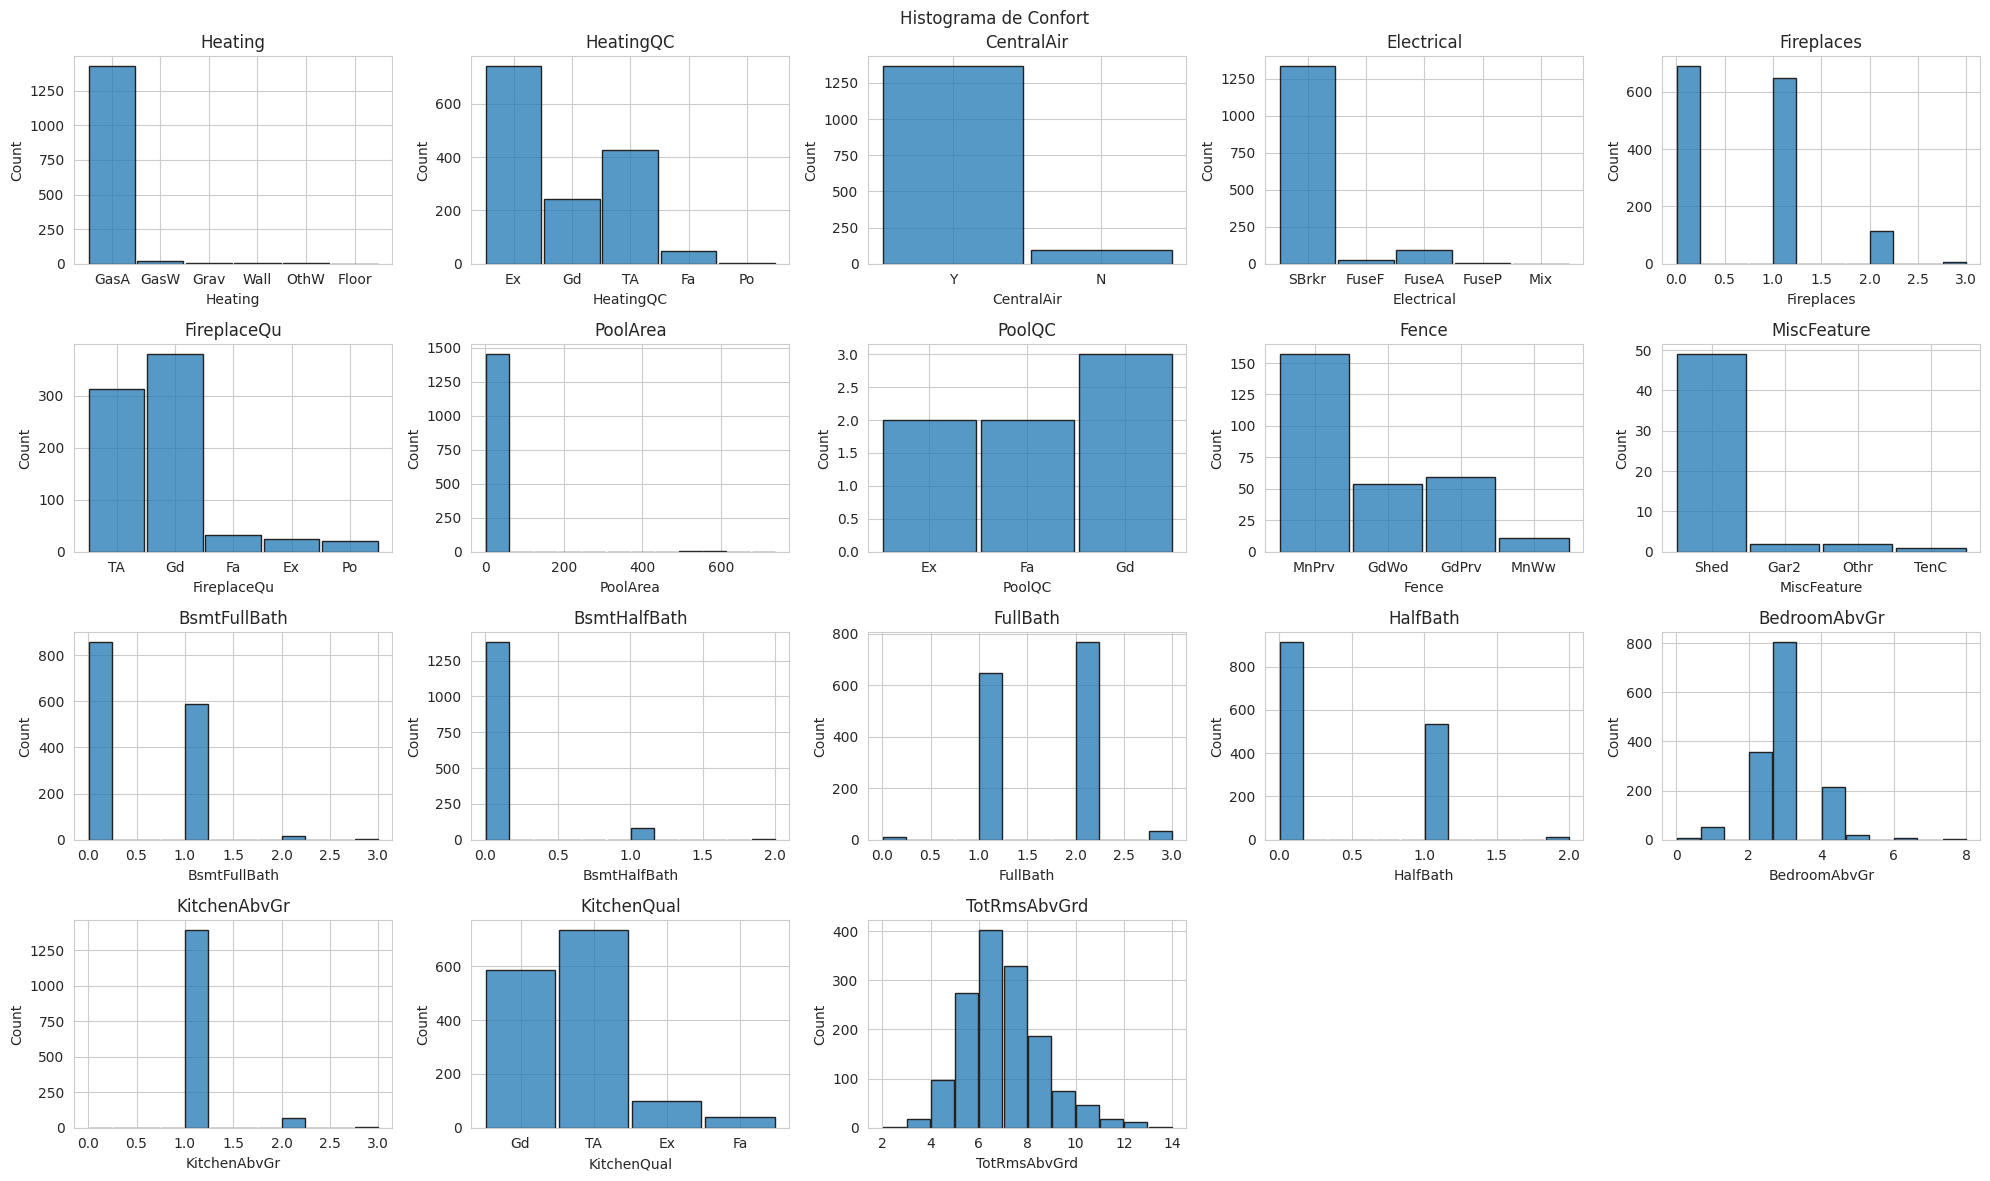

In [ ]:
create_group_graphic(train, comfort_cols, 'Confort')

**LIMPIEZA DE DATOS PROYECTO_R1.ipynb

In [5]:
!pip install category_encoders

!pip install --upgrade numpy
!pip install --force-reinstall catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.6 MB/s eta 

In [1]:
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler , PowerTransformer , RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split , cross_val_score , KFold

from sklearn.linear_model import LinearRegression,RidgeCV
from lightgbm import LGBMRegressor
from sklearn.ensemble import  ExtraTreesRegressor , StackingRegressor , GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

import category_encoders as ce
from xgboost import XGBRegressor


from catboost import CatBoostRegressor

pd.set_option('display.max_columns', None)

In [2]:
# LOAD DATAFRAME
path='/content/drive/MyDrive/Colab Notebooks/PROYECTO KAGGLE/1.1 House Prices/'
train = pd.read_csv(path+'train.csv')
test  = pd.read_csv(path+'test.csv')
lista_ID=test['Id']

df= pd.concat((train, test), axis=0)
df['SalePrice']=df['SalePrice'].fillna(0)


In [3]:
# ELIMINAR VARIABLES CON MAS DEL 80% DE NULO
#FireplaceQu Calidad de la chimenea no tomar en consideracion
cols_with_many_null = ['PoolQC', 'Alley', 'Fence',  'LotFrontage','FireplaceQu']
df.drop(labels=cols_with_many_null, axis=1, inplace=True)

# ELIMINAR LAS VARIABLES QUE TIENEN MUCHOS CEROS
cols_with_many_zero = ['PoolArea', '3SsnPorch','LowQualFinSF', 'MiscVal']
df.drop(labels=cols_with_many_zero, axis=1, inplace=True)

# ELIMINAR LAS VARIABLES QUE TIENE MAYORES REPETICIONES
cols_with_dominant_label = ['Id', 'Utilities', 'Street', 'Condition2','RoofMatl', 'Heating'] #
df.drop(labels=cols_with_dominant_label, axis=1, inplace=True)


In [4]:
# COLOCAR LAS VARIABLES DE AÑO , LA CANTIDAD DE NUMERO EN AÑOS
var_year = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for row in var_year:
    df[row] = df['YrSold'] - df[row]

In [5]:
# RELLENAR VARIABLES NUMERICAS A CERO
numerical_feature = df.select_dtypes(include=['number']).columns.tolist()
for feature in numerical_feature:
    df[feature] = df[feature].fillna(0)

# FILL CONTINUOUS MISSING VALUES
categorical_feature = train.select_dtypes(include='object').columns.tolist()
dropped_cols = cols_with_dominant_label + cols_with_many_null
mode_feature = ['Electrical', 'MsZoning', 'Functional', 'KitchenQual', 'Exterior2nd', 'Exterior1st','SaleType']

for feature in categorical_feature:
    if feature not in dropped_cols:
        if feature not in mode_feature:
            df[feature] = df[feature].fillna('NA')
        else:
            df[feature] = df[feature].fillna(df[feature].mode()[0])

In [6]:
# ADD NEW FEATURE 'GarageEfficiency'
df['GarageEfficiency'] = df['GarageArea'] / (df['GarageCars'] + 1)   # +1 TO AVOID DIVISION BY ZERO

# ADD NEW FEATURE TotalArea
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

In [7]:
# USING PCA TO ADDRESSING MULTICOLINEARITY
zscore = StandardScaler()

# NORMALIZATION
 # COLUMN THAT HAS MULTICOLINEARITY
multi_cols_1 = zscore.fit_transform( df[['GarageArea','GarageCars']] )

# FIND PRINCIPAL COMPONENT OPTIMAL
pca_1  = PCA(n_components=None)
pca_1.fit_transform(multi_cols_1)


# NORMALIZATION
multi_cols_2 = zscore.fit_transform( df[['1stFlrSF', 'TotalBsmtSF']])

# FIND PRINCIPAL COMPONENT OPTIMAL
pca_2  = PCA(n_components=None)
pca_2.fit_transform(multi_cols_2)

# NORMALIZATION
multi_cols_3 = zscore.fit_transform(df[['GrLivArea', 'TotRmsAbvGrd']])

# FIND PRINCIPAL COMPONENT OPTIMAL
pca_3  = PCA(n_components=None)
pca_3.fit_transform(multi_cols_3)

# CHOOSE PC1

pca_1  = PCA(n_components=1)
multi_cols_1 = pca_1.fit_transform(multi_cols_1)

pca_2  = PCA(n_components=1)
multi_cols_2 = pca_2.fit_transform(multi_cols_2)

pca_3  = PCA(n_components=1)
multi_cols_3 = pca_3.fit_transform(multi_cols_3)

# ADD PC1 TO DATAFRAME
df['multi_cols_1'] = multi_cols_1.ravel()
df['multi_cols_2'] = multi_cols_2.ravel()
df['multi_cols_3'] = multi_cols_3.ravel()


multi_corr = ['GarageCars','GarageArea','1stFlrSF', 'TotalBsmtSF','GrLivArea', 'TotRmsAbvGrd']

df.drop(labels= multi_corr, axis=1, inplace=True )

In [8]:
# CHOSEN FEATURE TO TRANSFORM
cols_to_transform = ['LotArea', 'BsmtUnfSF', 'TotalArea',  'multi_cols_2']

for col in cols_to_transform:
    yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
    df[[col]] = yeo_johnson.fit_transform(df[[col]])

In [9]:
ordinal_columns = {
    'LandSlope': ['NA','Gtl', 'Mod', 'Sev'],
    'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'] ,
    'PavedDrive' : ['NA','N', 'P', 'Y']  ,
    'LotShape':['NA','Reg', 'IR1', 'IR2', 'IR3']  ,
    'ExterQual' :['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure':['NA', 'No', 'Mn', 'Av', 'Gd'],
    'KitchenQual':['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond':['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC':['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Electrical':['NA','Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
    'GarageQual':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtFinType1':['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2':['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HouseStyle':['NA','1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'],  #??desde uno
    'Functional':['NA','Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'] ,  ##desde uno
    'GarageCond':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
}

for col, categories in ordinal_columns.items():
    df[col] = df[col].apply(lambda x: categories.index(x))

#pasar a variable_TargetEncoder
col_TargetEncoder=['MSSubClass','MSZoning','LotConfig','BldgType','RoofStyle','Foundation',
                   'GarageType','SaleCondition','Neighborhood','Condition1',
                   'Exterior1st','Exterior2nd','SaleType','MasVnrType','LandContour']


target_encoder = ce.TargetEncoder()
df[col_TargetEncoder] = target_encoder.fit_transform(df[col_TargetEncoder],df['SalePrice'])

df = pd.get_dummies(df).reset_index(drop=True)

In [10]:
# Edad de la propiedad al momento de venta
df['AgeAtSale'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['RemodAge'] = df['RemodAge'].apply(lambda x: x if x > 0 else 0)

# Interacción entre calidad y área
df['Qual_TotalArea'] = df['OverallQual'] * df['TotalArea']

# Interacción entre baños y habitaciones
df['BathroomRatio'] = (df['FullBath'] + 0.5 * df['HalfBath']) / (df['BedroomAbvGr'] + 1)

# Codificación target para categorías con muchos niveles
for col in ['Neighborhood', 'MSZoning']:
    temp_df = df.groupby(col)['SalePrice'].agg(['mean', 'count']).reset_index()
    temp_df[col+'_target_mean'] = temp_df['mean']
    temp_df[col+'_target_count'] = temp_df['count']
    df = df.merge(temp_df[[col, col+'_target_mean', col+'_target_count']], on=col, how='left')


monthly_trend = df.groupby(['YrSold', 'MoSold'])['SalePrice'].mean().reset_index()
monthly_trend.rename(columns={'SalePrice': 'MonthlyTrend'}, inplace=True)
df = df.merge(monthly_trend, on=['YrSold', 'MoSold'], how='left')

# Precio promedio por año de construcción (ventana móvil)
yearly_avg = df.groupby('YearBuilt')['SalePrice'].mean().rolling(5, min_periods=1).mean().reset_index()
yearly_avg.rename(columns={'SalePrice': 'YearBuiltAvgPrice'}, inplace=True)
df = df.merge(yearly_avg, on='YearBuilt', how='left')

# Conteo de amenities
df['TotalAmenities'] = (  df['Fireplaces'] + (df['WoodDeckSF'] > 0).astype(int) +  (df['OpenPorchSF'] > 0).astype(int) )

# Puntuación de calidad compuesta
df['QualityScore'] = ( 0.5 * df['OverallQual'] ) + ( 0.3 * df['ExterQual'] ) + ( 0.2 * df['KitchenQual'])

# Indicador de renovación
df['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)

In [11]:
######################################################################
new_train_data = df.iloc[:len(train), :]
new_test_data  = df.iloc[len(train):, :]

x_train = new_train_data.drop(labels=['SalePrice'], axis=1)
y_train = np.log1p(new_train_data['SalePrice']) # LOG TRANSFORMATION FOR TARGET FEATURE (SalePrice)

x_test = new_test_data.drop(labels=['SalePrice'], axis=1)


In [12]:
# NORMALIZATION

# CHOOSE COLUMNS TO NORMALIZE
cols_to_robust = ['MSSubClass','YearRemodAdd', '2ndFlrSF','BedroomAbvGr','OpenPorchSF',
                  'MasVnrArea','EnclosedPorch','BsmtFinSF1','ScreenPorch','BsmtFinSF2','GarageYrBlt','YearBuilt','WoodDeckSF']

# ROBUST SCALING NORM
robust = RobustScaler()
robust.fit(x_train[cols_to_robust])

x_train[cols_to_robust] = robust.transform(x_train[cols_to_robust])
x_test[cols_to_robust]  = robust.transform(x_test[cols_to_robust])

# ZSCORE NORM
cols_to_zscore = ['GarageEfficiency','LotArea','TotalArea','OverallQual','multi_cols_1','OverallCond','multi_cols_2','BsmtUnfSF','multi_cols_3']
zscore = StandardScaler()
zscore.fit(x_train[cols_to_zscore])

x_train[cols_to_zscore] = zscore.transform(x_train[cols_to_zscore])
x_test[cols_to_zscore]  = zscore.transform(x_test[cols_to_zscore])

x_train.shape , y_train.shape, x_test.shape


((1460, 82), (1460,), (1459, 82))

In [ ]:
#unir x_train,y_train   y #save csv
#data=x_train.copy()
#data['SalePrice']=y_train

#data=pd.concat([data,x_test])

In [13]:
XX_train, XX_test, YY_train, YY_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

XX_train.to_csv(path+'x_train170525.csv', index=False)
YY_train.to_csv(path+'y_train170525.csv', index=False)
XX_test.to_csv(path+'x_test170525.csv', index=False)
YY_test.to_csv(path+'y_test170525.csv', index=False)

** BUSCAR PARAMETROS CON GridSearchCV

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_absolute_error, mean_squared_error,mean_squared_log_error
from sklearn.model_selection import train_test_split,GridSearchCV
import category_encoders as ce

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/PROYECTO KAGGLE/1.1 House Prices/'

X_train=pd.read_csv(path+'x_train170525.csv')
y_train=pd.read_csv(path+'y_train170525.csv')
X_test=pd.read_csv(path+'x_test170525.csv')
y_test=pd.read_csv(path+'y_test170525.csv')

In [ ]:
models = {
   # "Linear": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1), #n_estimators=100, random_state=42
    "GradientBoosting":GradientBoostingRegressor(random_state=42), #n_estimators=700, random_state=42
    "XGB":XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1), #n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42
    'LightGBM': LGBMRegressor(objective='regression', random_state=42, n_jobs=-1),     #n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42 device='gpu',
    "CatBoost":CatBoostRegressor(loss_function='RMSE', random_state=42, verbose=0), #iterations=200, learning_rate=0.1, depth=6, random_seed=42, verbose=False
}

model_params={
   # "Linear": { 'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  },# Parámetro de regularización L2
    #"Ridge":{'alpha': [0.01, 0.1, 1, 10, 100, 1000]},  #alpha=1.0, random_state=42
    #'Lasso':{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}, #alpha=1.0, random_state=42
    #"DecisionTree": { 'max_depth': [3, 5, 10],
     #                 'min_samples_split': [2, 5, 10],
      #                'min_samples_leaf': [1, 3, 5],
       #               'max_features': ['sqrt', 'log2']
        #              }, #random_state=42
    "RandomForest": { 'n_estimators': [200, 500, 700],
                      'max_depth': [ 10, 20],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 5, 7],
                      'max_features': ['sqrt', 'log2'],
                      'bootstrap': [True, False]
                      }, #n_estimators=100, random_state=42
    "GradientBoosting":{
          'n_estimators': [200, 500, 700],
          'learning_rate': [0.01, 0.05, 0.1],
          'max_depth': [3, 5, 10],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 3, 5],
          'subsample': [0.8, 1.0],
          'max_features': ['sqrt', 'log2']
        }, #n_estimators=700, random_state=42
    "XGB":{
        'n_estimators': [200, 500, 700],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    }, #n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42
    'LightGBM': {
         'n_estimators': [300, 500, 700],
         'learning_rate': [0.01, 0.05, 0.1],
         'max_depth': [3, 5, 10,-1],
         'num_leaves': [20, 31, 40],
         'reg_alpha': [0, 0.1, 0.5],
         'reg_lambda': [0, 0.1, 0.5]
    },     #n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42
    "CatBoost":{
        'iterations': [300, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [3, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 10],
        'bagging_temperature': [0.1, 0.5, 1],
        'random_strength': [0.1, 0.5, 1],
        'border_count': [32, 64, 128]
    } #iterations=200, learning_rate=0.1, depth=6, random_seed=42, verbose=False

}

In [ ]:
%%time
#usar Grid
model_best_params={}
for name, model in models.items():
  param_grid=model_params[name]
  grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1, verbose=1) #neg_mean_squared_error
  grid_search.fit(X_train, y_train)
  print("Mejores parámetros: "+name, grid_search.best_params_)
  print("********************")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mejores parámetros: RandomForest {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
********************
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Mejores parámetros: GradientBoosting {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 700, 'subsample': 0.8}
********************
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Mejores parámetros: XGB {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 700, 'subsample': 0.8}
********************
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3962
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 79
[LightGBM] [Info] Start training from score 12.030658
Mejores parámetros: LightGBM {'learning_rate': 0.05, 'max_depth': -1, 'n_e

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


** ENTRENAR MODELOS

In [14]:
#MODELOS
result={}

def  modelo(name,model,test):
   print(f"Modelo: {name} Guardado en CSV")
   predictions = model.predict(test)
   output = pd.DataFrame({'Id': lista_ID,'SalePrice': np.exp(predictions)})
    #guardar en csv
   output.to_csv(f'{name}.csv', index=False)

def grafica_modelo(name,y_test,y_pred):
  plt.scatter(y_test, y_pred, alpha=0.3)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
  plt.xlabel('Valores Reales')
  plt.ylabel('Predicciones')
  plt.title(f'Comparación {name}')
  plt.show()



RMSE: 0.12162364590095794
Modelo: linear Guardado en CSV


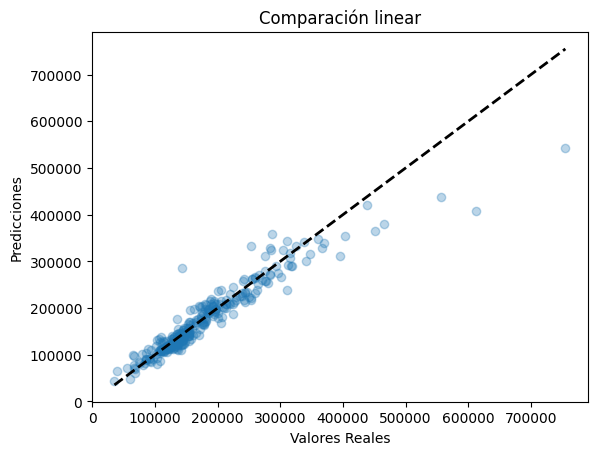

In [15]:
linear_model = LinearRegression()
linear_model.fit(XX_train, YY_train)
linear_predictions = linear_model.predict(XX_test)

#error RMSE
data_y=np.exp(YY_test)
data_pred=np.exp(linear_predictions)

rmse = np.sqrt(mean_squared_log_error( data_y,  data_pred))
print(f"RMSE: {rmse}")

#RMSE: 0.12181201505838157 17.05.25
#RMSE: 0.12162364590095794  17.05.25 v2

modelo('linear',linear_model,x_test)
result['linear']=rmse

grafica_modelo('linear',data_y,data_pred)

RMSE: 0.1255242953738235
Modelo: CatBoostRegressor Guardado en CSV


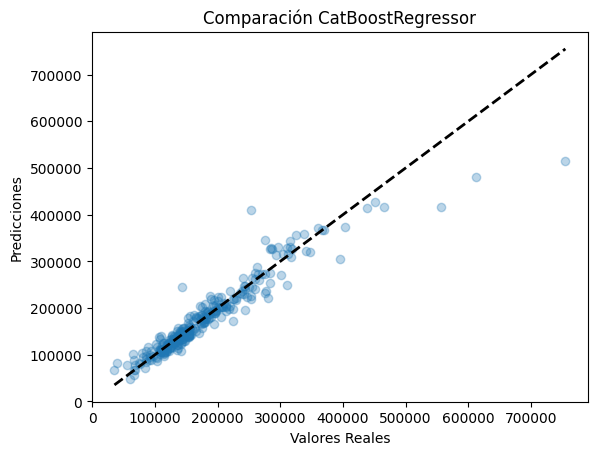

In [16]:
model_cat=CatBoostRegressor(loss_function='RMSE',
                           random_state=42,
                           verbose=0,
                           learning_rate=0.1,
                           max_depth= 5,
                           n_estimators=500,
                           subsample= 0.8
                            ) #iterations=200, learning_rate=0.1, depth=6, random_seed=42, verbose=False
model_cat.fit(XX_train, YY_train)

predictions = model_cat.predict(XX_test)

#error RMSE
data_y=np.exp(YY_test)
data_pred=np.exp(predictions)

rmse = np.sqrt(mean_squared_log_error( data_y, data_pred))
print(f"RMSE: {rmse}")

#RMSE: 0.12245701923559262 17.05.25
#RMSE: 0.1255242953738235 17.05.25 v2
modelo('CatBoostRegressor',model_cat,x_test)
result['CatBoostRegressor']=rmse
grafica_modelo('CatBoostRegressor',data_y,data_pred)

RMSE: 0.1295775264930846
Modelo: GradientBoostingRegressor Guardado en CSV


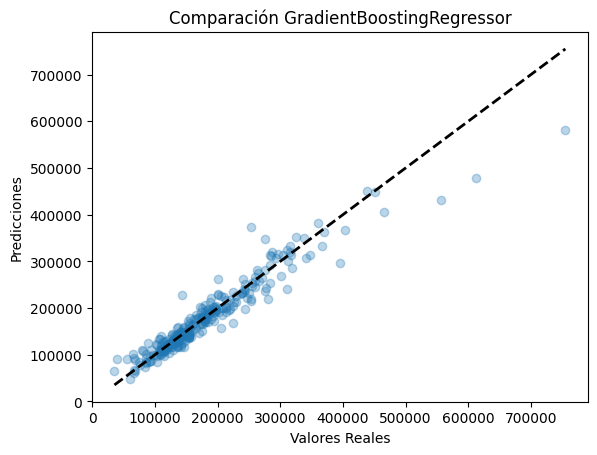

In [17]:
model_GBR=GradientBoostingRegressor(random_state=42,
                                learning_rate=0.05,
                                max_depth= 3,
                                max_features= 'sqrt',
                                min_samples_leaf= 5,
                                min_samples_split= 2,
                                n_estimators=700,
                                subsample= 1.0)

model_GBR.fit(XX_train, YY_train)
predictions = model_GBR.predict(XX_test)

#error RMSE
data_y=np.exp(YY_test)
data_pred=np.exp(predictions)

rmse = np.sqrt(mean_squared_log_error( data_y, data_pred))
print(f"RMSE: {rmse}")
#RMSE: 0.12986590900770628 17.05.25
#RMSE: 0.1295775264930846 17.05.25 v2
modelo('GradientBoostingRegressor',model_GBR,x_test)
result['GradientBoostingRegressor']=rmse
grafica_modelo('GradientBoostingRegressor',data_y,data_pred)


RMSE: 0.12842165600381691
Modelo: XGBRegressor Guardado en CSV


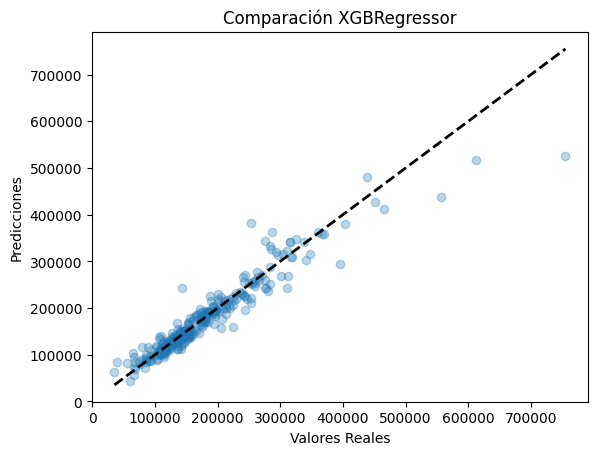

In [18]:
model_XGB=XGBRegressor(objective='reg:squarederror',
                        random_state=42,
                       n_jobs=-1,
                       colsample_bytree= 0.8,
                       gamma= 0,
                       learning_rate= 0.05,
                       max_depth=3,
                       min_child_weight= 1,
                       n_estimators=700,
                       subsample= 0.8)

model_XGB.fit(XX_train, YY_train)
predictions = model_XGB.predict(XX_test)

data_y=np.exp(YY_test)
data_pred=np.exp(predictions)

#error RMSE
rmse = np.sqrt(mean_squared_log_error( data_y,  data_pred))
print(f"RMSE: {rmse}")

modelo('XGBRegressor',model_XGB,x_test)
result['XGBRegressor']=rmse

grafica_modelo('XGBRegressor',data_y,data_pred)

#0.12842165600381691

RMSE: 0.14035291120217577
Modelo: RandomForest Guardado en CSV


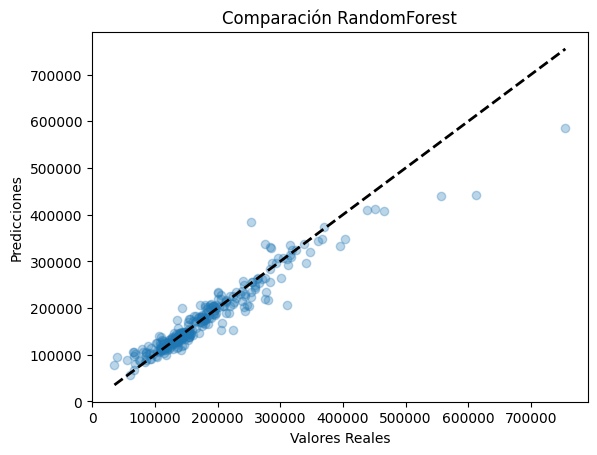

In [19]:
model_RandomForest= RandomForestRegressor(random_state=42,
                                          n_jobs=-1,
                                          bootstrap= False,
                                          max_depth= 20,
                                          max_features= 'sqrt',
                                          min_samples_leaf=1,
                                          min_samples_split= 2,
                                          n_estimators= 700)

model_RandomForest.fit(XX_train, YY_train)
predictions = model_RandomForest.predict(XX_test)

data_y=np.exp(YY_test)
data_pred=np.exp(predictions)


#error RMSE
rmse = np.sqrt(mean_squared_log_error( data_y,  data_pred))
print(f"RMSE: {rmse}")

modelo('RandomForest',model_RandomForest,x_test)
result['RandomForest']=rmse

grafica_modelo('RandomForest',data_y,data_pred)
#RMSE: 0.14035291120217588

RMSE: 0.13250906972846474
Modelo: model_LGBM Guardado en CSV


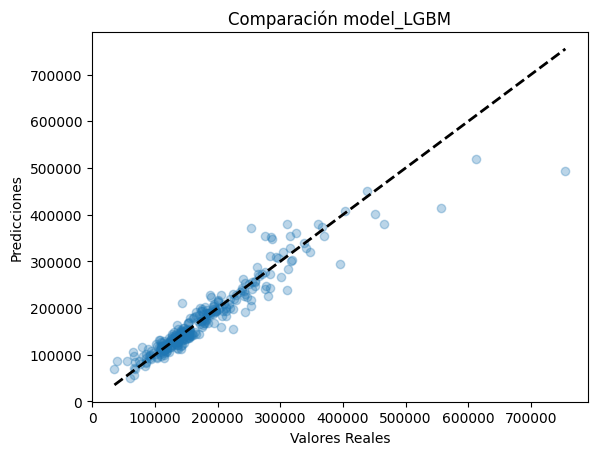

In [20]:
model_LGBM=  LGBMRegressor(objective='regression',
                       random_state=42,
                       n_jobs=-1,
                       learning_rate= 0.05,
                       max_depth= 3,
                       n_estimators= 700,
                       num_leaves= 20,
                       reg_alpha= 0,
                       reg_lambda= 0.5,
                      verbose=-1)

model_LGBM.fit(XX_train, YY_train)
predictions = model_LGBM.predict(XX_test)

#error RMSE
data_y=np.exp(YY_test)
data_pred=np.exp(predictions)

rmse = np.sqrt(mean_squared_log_error( data_y,  data_pred))
print(f"RMSE: {rmse}")

modelo('model_LGBM',model_RandomForest,x_test)
result['model_LGBM']=rmse

grafica_modelo('model_LGBM',data_y,data_pred)
#0.13250906972846474

RMSE: 0.12126606118995675
Modelo: FINAL3MODELO170525_V2 Guardado en CSV


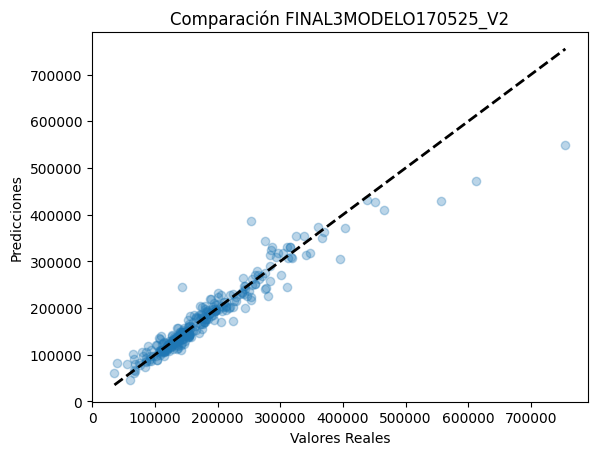

CPU times: user 1min 11s, sys: 5.03 s, total: 1min 16s
Wall time: 1min 2s


In [21]:
%%time
cv_fold = KFold(n_splits= 15, shuffle=True, random_state=12)

# CREATE STACKING REGRESSOR
model = StackingRegressor(
    estimators=[
        ('GradientBoostingRegressor', model_GBR),
        ('catboost', model_cat),
        ('linear',linear_model)
    ],
        final_estimator = RidgeCV(),
        cv=cv_fold
)

model.fit(XX_train, YY_train)
predictions = model.predict(XX_test)

#error RMSE
data_y=np.exp(YY_test)
data_pred=np.exp(predictions)

rmse = np.sqrt(mean_squared_log_error(data_y, data_pred))
print(f"RMSE: {rmse}")
result['3modelos']=rmse

#RMSE: 0.12413 303367156672
#RMSE: 0.12581 67186092784
#RMSE: 0.12445 464356724355
#RMSE: 0.12058 456592983786 -> 0.11853  -> 17.05.25

#RMSE: 0.12126606118995675  -> 0.11814  -> 17.05.25 v2
modelo('FINAL3MODELO170525_V2',model,x_test)

grafica_modelo('FINAL3MODELO170525_V2',data_y,data_pred)



In [22]:
result

{'linear': np.float64(0.12162364590095794),
 'CatBoostRegressor': np.float64(0.1255242953738235),
 'GradientBoostingRegressor': np.float64(0.1295775264930846),
 'XGBRegressor': np.float64(0.12842165600381691),
 'RandomForest': np.float64(0.14035291120217577),
 'model_LGBM': np.float64(0.13250906972846474),
 '3modelos': np.float64(0.12126606118995675)}

In [23]:
def graficar_resultados(resul):
  #crear grafica
  datarmsle=resul
  # Ordenar por valores
  valores_ordenados = dict(sorted(datarmsle.items(), key=lambda item: item[1]))

  # Crear la gráfica
  plt.figure(figsize=(15, 5))
  bars = plt.bar(valores_ordenados.keys(), valores_ordenados.values())

  # Agregar los valores sobre las barras
  for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.6f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

  plt.xlabel('Modelos')
  plt.ylabel('Valores')
  plt.title('Comparación de Modelos Ordenados')
  plt.xticks(rotation=45)
  plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
  plt.show()



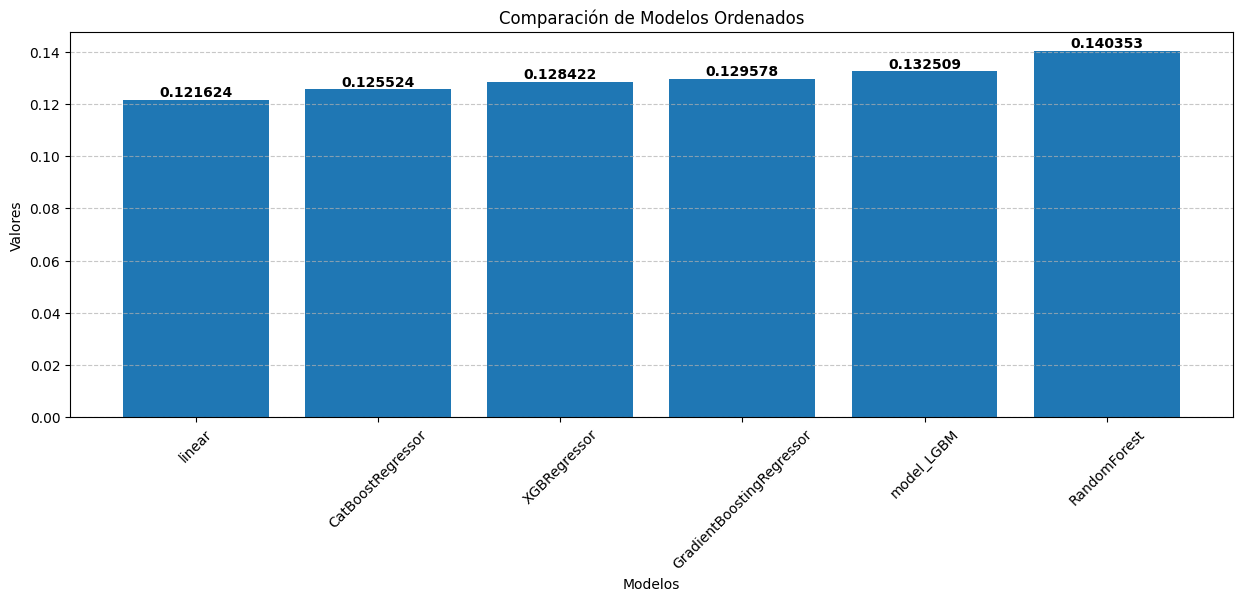

In [24]:
#eliminar
del result['3modelos']
graficar_resultados(result)

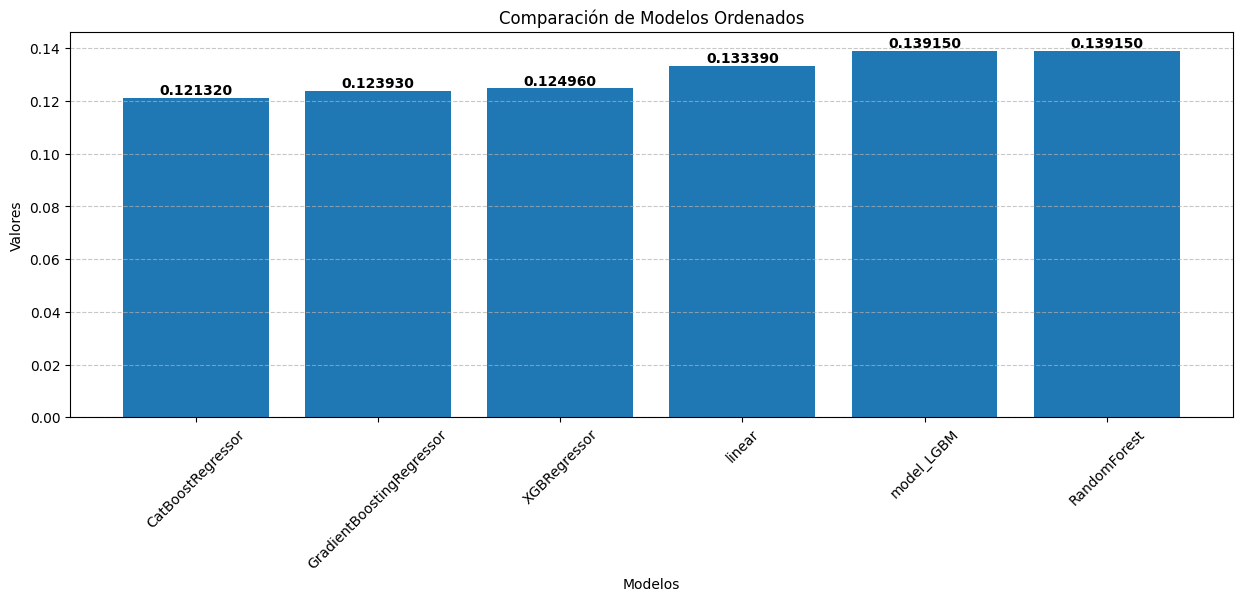

In [25]:
resul_kaggle={
    'linear' : 0.13339,
    'CatBoostRegressor':0.12132,
    'GradientBoostingRegressor':0.12393,
    'XGBRegressor':0.12496,
    'model_LGBM':0.13915,
    'RandomForest':0.13915
}


#{'linear': np.float64(0.12162364590095794),
 #'CatBoostRegressor': np.float64(0.1255242953738235),
 #'GradientBoostingRegressor': np.float64(0.1295775264930846),
 #'XGBRegressor': np.float64(0.12842165600381691),
 #'RandomForest': np.float64(0.14035291120217588),
 #'model_LGBM': np.float64(0.13250906972846474),
 #'3modelos': np.float64(0.12126606118995675)}
graficar_resultados(resul_kaggle)